# **Problem statement**
` E-comm has hired you as a data scientist and they want to understand how much would be the rate of repeating customer.
For this request you to visit kaggle.com and work on the dataset that can be found from here:https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction.

build a proof of concept stating the actionable insights out of the given problem statement

- **Data Variable Descerption**
- E Comm CustomerID -- Unique customer ID
- E Comm Churn- Churn Flag,1 if the customer is no more engaged with company during some period or 0 if he/she is engaged.
- E Comm Tenure -- Tenure of customer in organization
- E Comm PreferredLoginDevice -- Preferred login device of customer
- E Comm CityTier -- City tier
- E Comm WarehouseToHome -- Distance in between warehouse to home of customer
- E Comm PreferredPaymentMode -- Preferred payment method of customer
- E Comm Gender -- Gender of customer
- E Comm HourSpendOnApp -- Number of hours spend on mobile application or website
- E Comm NumberOfDeviceRegistered -- Total number of deceives is registered on - - - particular customer
- E Comm PreferedOrderCat -- Preferred order category of customer in last month
- E Comm SatisfactionScore -- Satisfactory score of customer on service
- E Comm MaritalStatus -- Marital status of customer
- E Comm NumberOfAddress -- Total number of added added on particular customer
- E Comm Complain -- Any complaint has been raised in last month 1,if yes, 0 if not registerd
- E Comm OrderAmountHikeFromlastYear -- Percentage increases in order from last year
- E Comm CouponUsed -- Total number of coupon has been used in last month
- E Comm OrderCount -- Total number of orders has been places in last month
- E Comm DaySinceLastOrder -- Day Since last order by customer
- E Comm CashbackAmount -- Average cashback in last month

# Importing libraries

In [5]:
import pandas as pd #importing pandas
import numpy as np  #importing numpy
import matplotlib.pyplot as plt #importing matplotlib
import seaborn as sns   #importing seaborn
%matplotlib inline

# Dataset loading

In [6]:
!pip install xlrd
data=pd.read_excel("/content/E Commerce Dataset.xlsx",sheet_name="E Comm")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
print("shape of data is ",data.shape)

shape of data is  (5630, 20)


# Observation
- Dataset has 5630 rows and 20 columns

In [8]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Data exploration

In [9]:
#Checking the null values
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

#Null imputation

In [10]:
data["Tenure"].fillna(data["Tenure"].mean(), inplace = True)
data["WarehouseToHome"].fillna(data["WarehouseToHome"].mean(),inplace=True)
data["HourSpendOnApp"].fillna(data["HourSpendOnApp"].mean(),inplace=True)
data["OrderAmountHikeFromlastYear"].fillna(data["OrderAmountHikeFromlastYear"].mean(),inplace=True)
data["CouponUsed"].fillna(data["CouponUsed"].mean(),inplace=True)
data["OrderCount"].fillna(data["OrderCount"].mean(),inplace=True)
data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].mean(),inplace=True)


In [11]:
#Checking the null values
data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [12]:
#Check the inconsistaancy in the data---> Type of the data mapped to the columns
data.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

#Typecasting
- There are a few columns that are ideally mapped as a continous
data where the nature of that column represent a category.

- In order to understand the overall flow of the data will explicity type casting for the following columns:-

- Churn--->Object
- CityTier--->Object
- SatisfactionScore--->object
- Complain--->object

In [13]:
# Performing type casting of data
print("Datatype of the column Churn is ",data.dtypes["Churn"])

Datatype of the column Churn is  int64


In [14]:
# Performing type casting of data
print("Datatype of the column CityTier is ",data.dtypes["CityTier"])

Datatype of the column CityTier is  int64


In [15]:
# Performing type casting of data
print("Datatype of the column SatisfactionScore is ",data.dtypes["SatisfactionScore"])

Datatype of the column SatisfactionScore is  int64


In [16]:
# Performing type casting of data
print("Datatype of the column Complain is ",data.dtypes["Complain"])

Datatype of the column Complain is  int64


In [17]:
#Converting Churn data into object type
data["Churn"]=data["Churn"].astype("object")
print("datatype of Churn after typecasting of data is ",data["Churn"].dtypes)
#Converting CityTier data into object type
data["CityTier"]=data["CityTier"].astype("object")
print("datatype of CityTier after typecasting of data is ",data["CityTier"].dtypes)
#converting SatisfactionScore data into object type
data["SatisfactionScore"]=data["SatisfactionScore"].astype("object")
print("datatype of SatisfactionScore after typecasting of data is ",data["SatisfactionScore"].dtypes)
#converting Complain data into object type
data["Complain"]=data["Complain"].astype("object")
print("datatype of Complain after typecasting of data is ",data["Complain"].dtypes)


datatype of Churn after typecasting of data is  object
datatype of CityTier after typecasting of data is  object
datatype of SatisfactionScore after typecasting of data is  object
datatype of Complain after typecasting of data is  object


# Exploratory Data Analysis

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   object 
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [19]:
#seperating categorical and continous columns
continous_col=[]
categorical_col=[]
for col in data.columns:
    if data[col].dtypes=="object":
        categorical_col.append(col)
    else:
        continous_col.append(col)



In [20]:
#The list of continous columns
continous_col

['CustomerID',
 'Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [21]:
#The list of categorical columns
categorical_col

['Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Complain']

# Univariate Analysis

# Plotting frequency distribution for continous columns

In [22]:
continous_col

['CustomerID',
 'Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

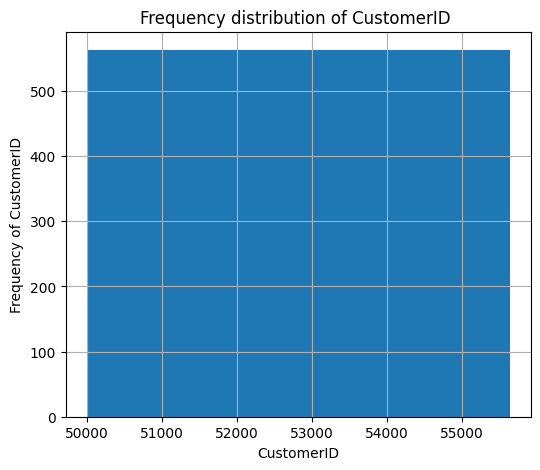

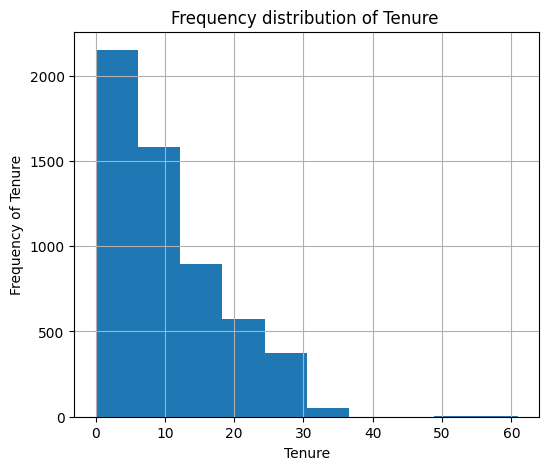

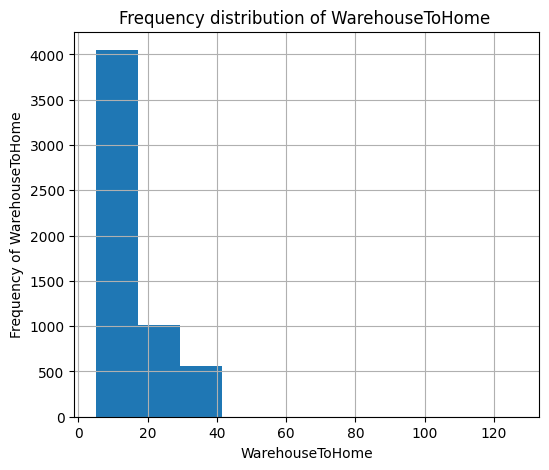

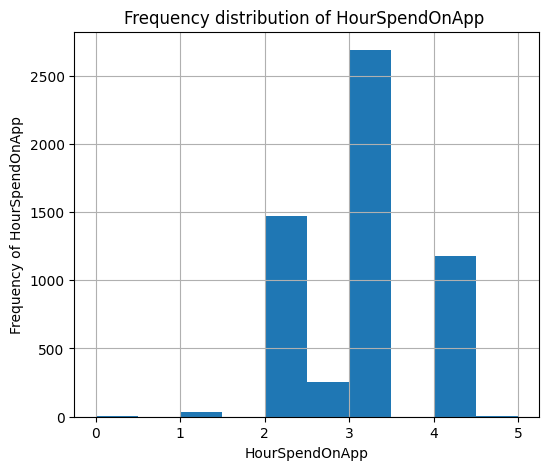

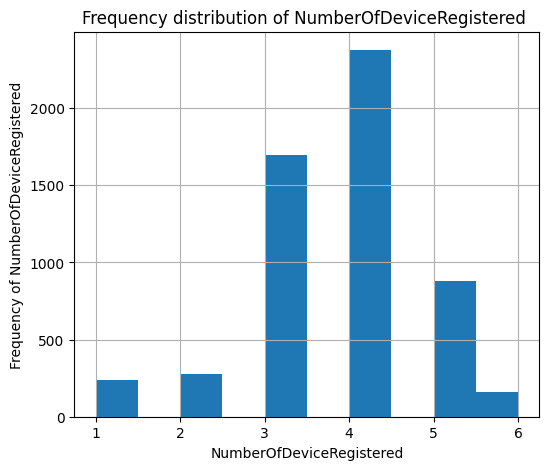

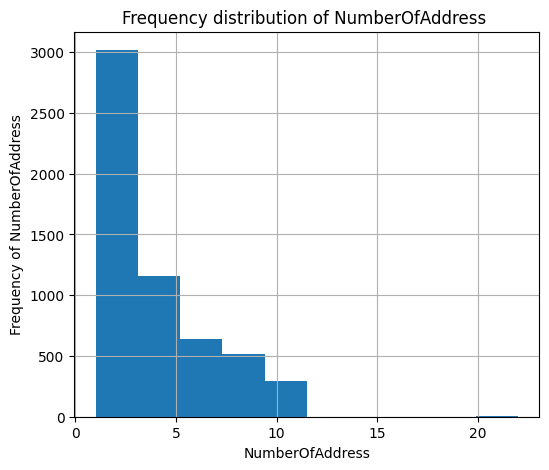

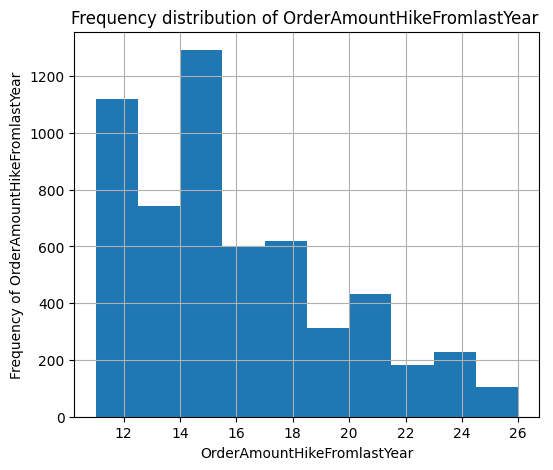

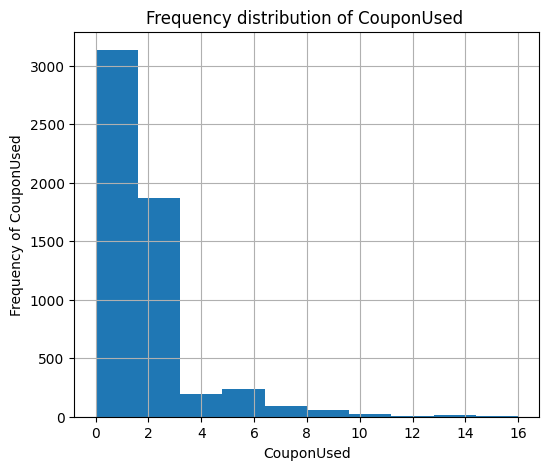

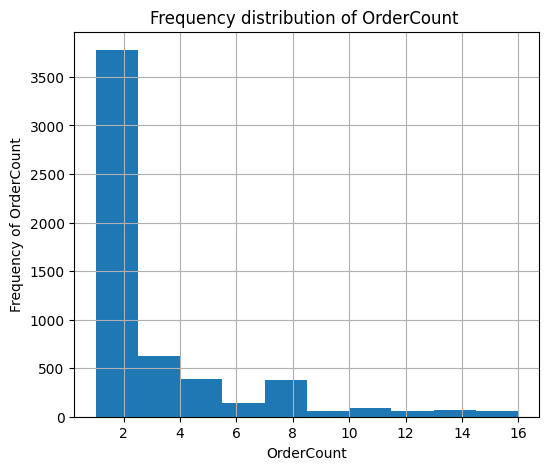

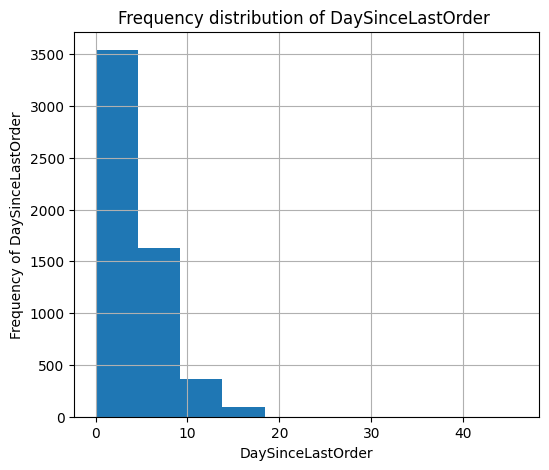

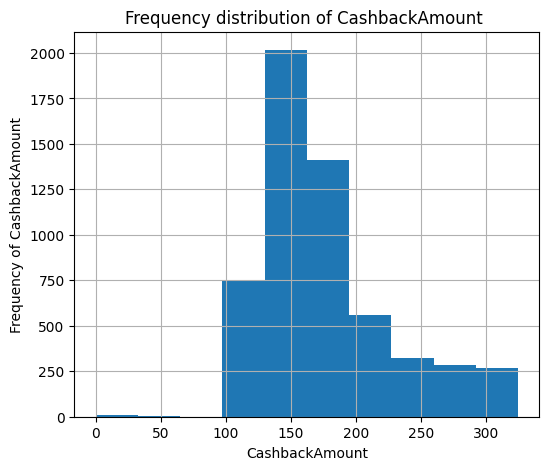

In [23]:
#Plotting frequency distribution for all columns in continous columns
for col in continous_col:
    #Initialising figure size as Figure size[6,5]
    plt.figure(figsize=[6,5])
    #Plotting a frequency distribution for all columns
    plt.hist(data[col])
    #Label the x axis
    plt.xlabel(col)
    #Label the y axis
    plt.ylabel("Frequency of {}".format(col))
    #Giving the title on top
    plt.title("Frequency distribution of {} ".format(col))
    #To add grid structure using grid();
    plt.grid();
    #To remove the array in output  using plt.show();
    plt.show()

### **Observations**

- From customer_id we can see that there is no specific distribution. Hence, this feature is not very important.
- From Tenure we can conclude that maximum customers joined company in last 10-12 years.
- The distance between warehouse and customer location is less than 20km for most of the cases.
- Most of the customers spend 2-4 hours on application.
- Customer prefer registeration from 3 to 4 devices.
- Frequency distribution of order amount hike from last year has slight right skewed.which means there are some outliers.
-Almost all user used 1 to 3 coupons, coupon used has right skewed distribution that means we can expect a few outliers.
- Most of the customer order in regular, more than 60% customer place next order within 10 days after one order.
- almost all user got more than 100 rs as cashback.
-Ordercount has right skewed distribution.
- Age has a right skewed distribution which means we can expect a number of outliers towards the right hand side of the age feature.

In [24]:
data[continous_col].describe()

,CustomerID,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,10.189899,15.639896,2.931535,3.688988,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,8.354164,8.339095,0.705384,1.023999,2.583586,3.587926,1.851038,2.871521,3.553382,49.207036
min,50001.000000,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,3.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,4.000000,163.280000
75%,54222.750000,15.000000,20.000000,3.000000,4.000000,6.000000,18.000000,2.000000,3.008004,7.000000,196.392500
max,55630.000000,61.000000,127.000000,5.000000,6.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### **Uni-variate Analysis for Categorical Plots**


In [25]:
categorical_col

['Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Complain']

In [26]:
data["Churn"].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [27]:
#   Value counts for categorical columns
for col in categorical_col:
    print("*"*50)
    print("value counts for {} is ".format(col))
    print(data[col].value_counts())
    print("*"*50)



**************************************************
value counts for Churn is 
0    4682
1     948
Name: Churn, dtype: int64
**************************************************
**************************************************
value counts for PreferredLoginDevice is 
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
**************************************************
**************************************************
value counts for CityTier is 
1    3666
3    1722
2     242
Name: CityTier, dtype: int64
**************************************************
**************************************************
value counts for PreferredPaymentMode is 
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
**************************************************
**************************

In [28]:
categorical_col

['Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Complain']

<Axes: xlabel='count', ylabel='Churn'>

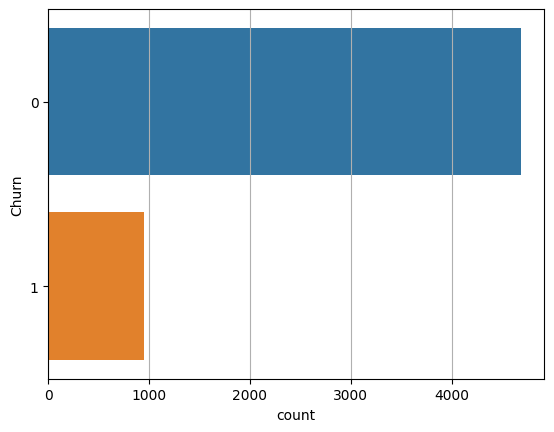

In [29]:
#plotting a counplot for Churn
plt.grid();
sns.countplot(data=data,y="Churn")

**************************************************
the value count for the Churn is
0    4682
1     948
Name: Churn, dtype: int64


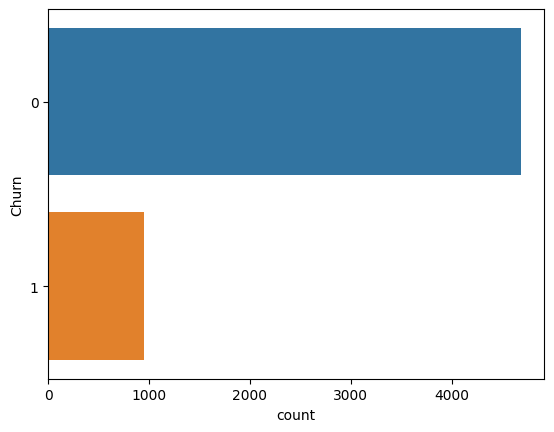

**************************************************
the value count for the PreferredLoginDevice is
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


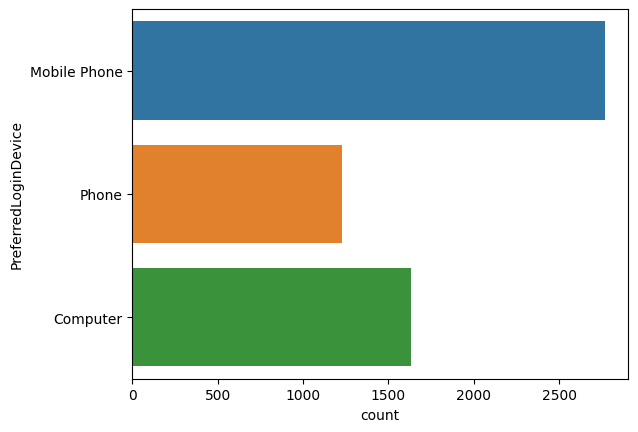

**************************************************
the value count for the CityTier is
1    3666
3    1722
2     242
Name: CityTier, dtype: int64


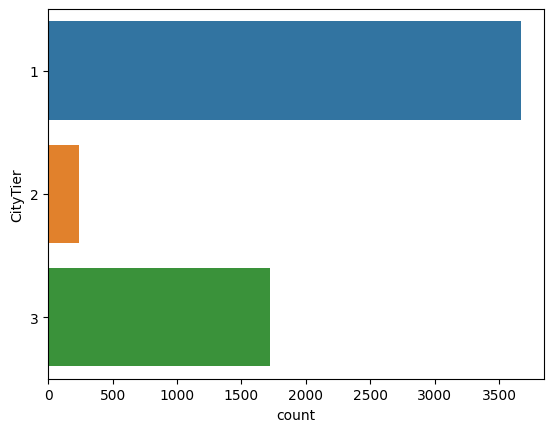

**************************************************
the value count for the PreferredPaymentMode is
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


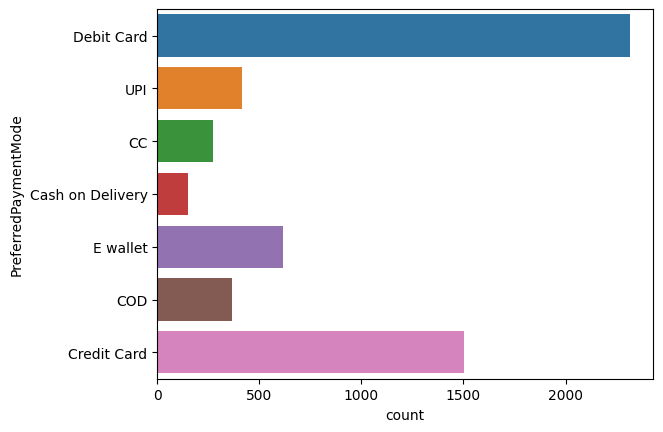

**************************************************
the value count for the Gender is
Male      3384
Female    2246
Name: Gender, dtype: int64


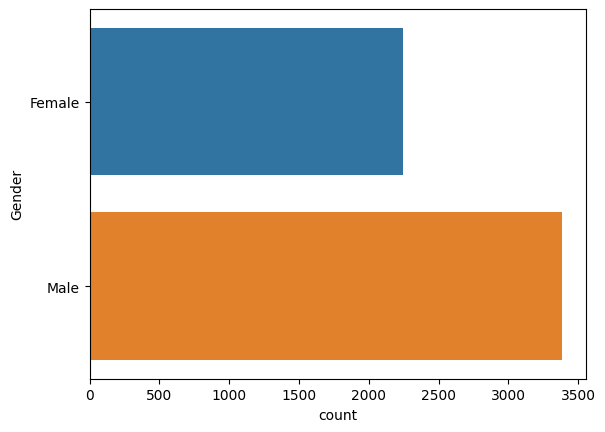

**************************************************
the value count for the PreferedOrderCat is
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


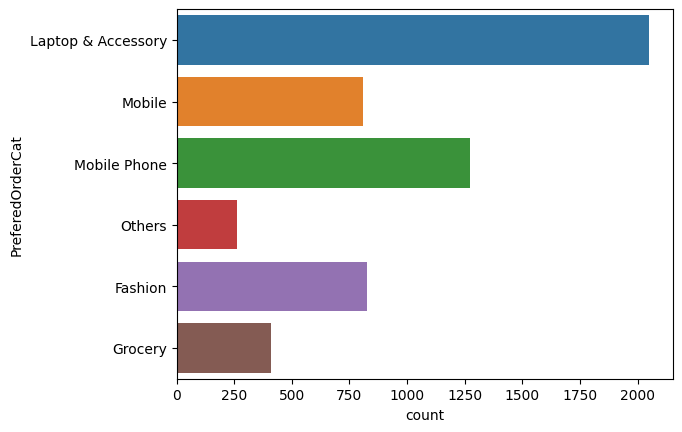

**************************************************
the value count for the SatisfactionScore is
3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64


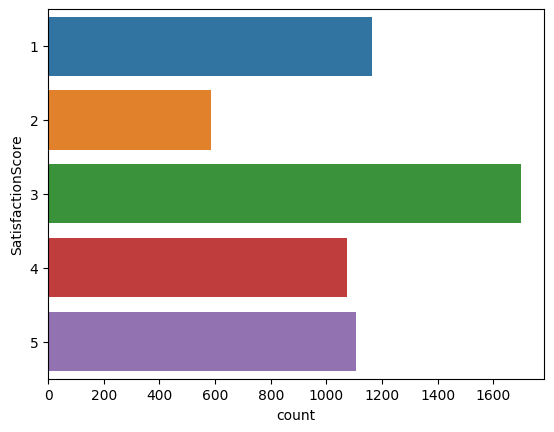

**************************************************
the value count for the MaritalStatus is
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


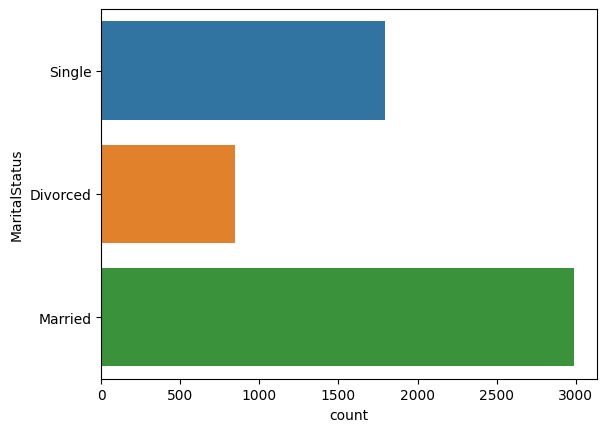

**************************************************
the value count for the Complain is
0    4026
1    1604
Name: Complain, dtype: int64


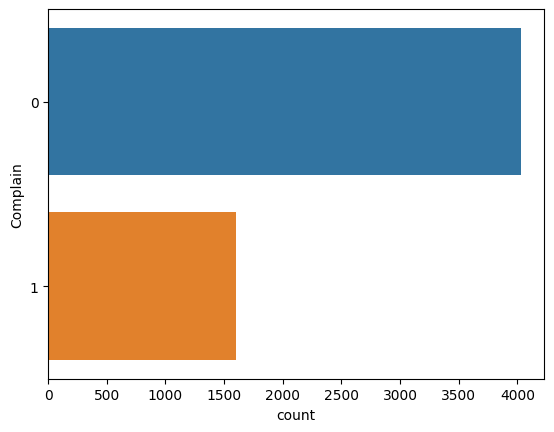

In [30]:
#Plotting countplot for all the columns in categorical_col
for col in categorical_col:
    print("*"*50)
    print("the value count for the {} is\n{}".format(col,data[col].value_counts()))
    sns.countplot(data=data,y=col)
    plt.show();


#Observations
- A large no. of customers group is using cards for payments.
- Mens and female customers distribution is 60-40.
- If we consider ratings 3,4 and 5 as good score, 40% of  customers are not satisfied with our services.
- 28% complains resgisters for the given records.

#  **How does each categorical feature effect the target "Churn" ?**

**************************************************
value counts for the category Churn is 
0    4682
1     948
Name: Churn, dtype: int64


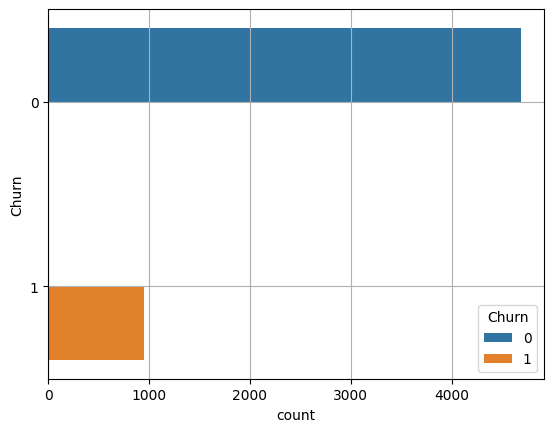

**************************************************
value counts for the category PreferredLoginDevice is 
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


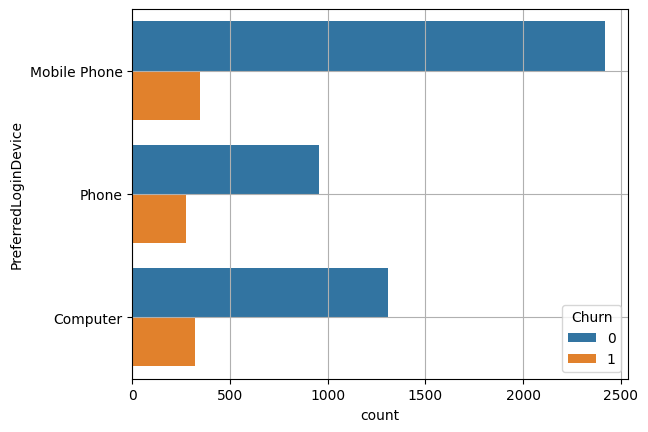

**************************************************
value counts for the category CityTier is 
1    3666
3    1722
2     242
Name: CityTier, dtype: int64


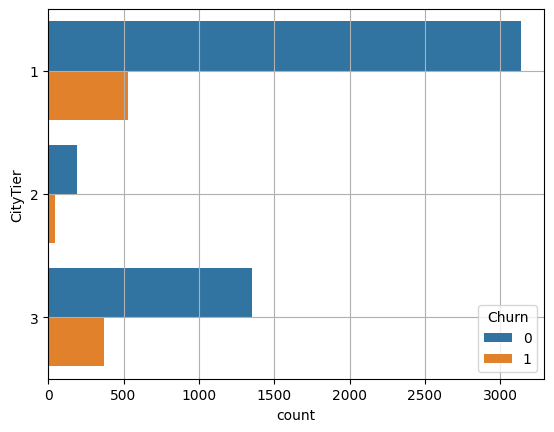

**************************************************
value counts for the category PreferredPaymentMode is 
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


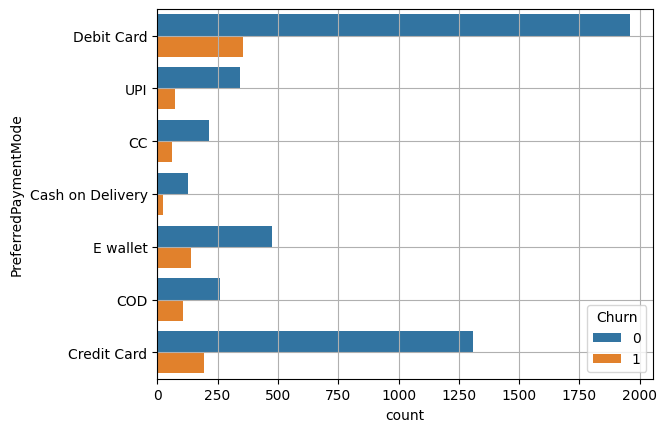

**************************************************
value counts for the category Gender is 
Male      3384
Female    2246
Name: Gender, dtype: int64


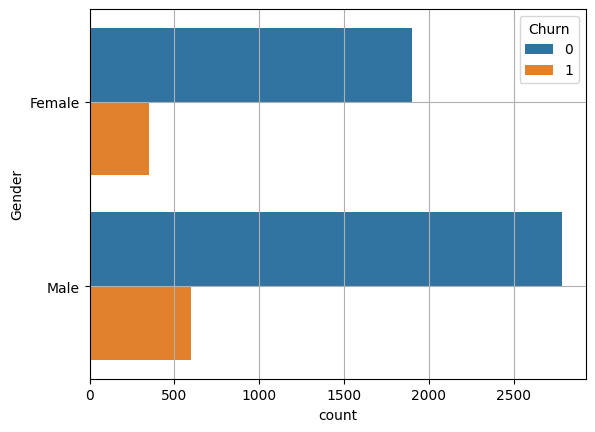

**************************************************
value counts for the category PreferedOrderCat is 
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


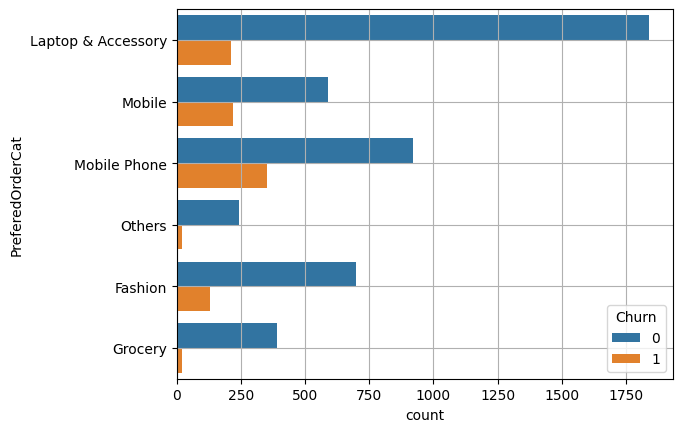

**************************************************
value counts for the category SatisfactionScore is 
3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64


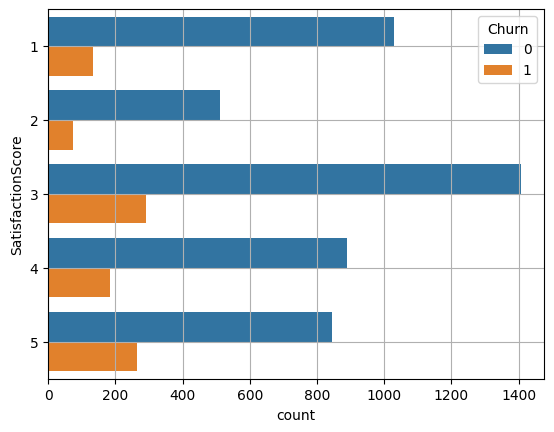

**************************************************
value counts for the category MaritalStatus is 
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


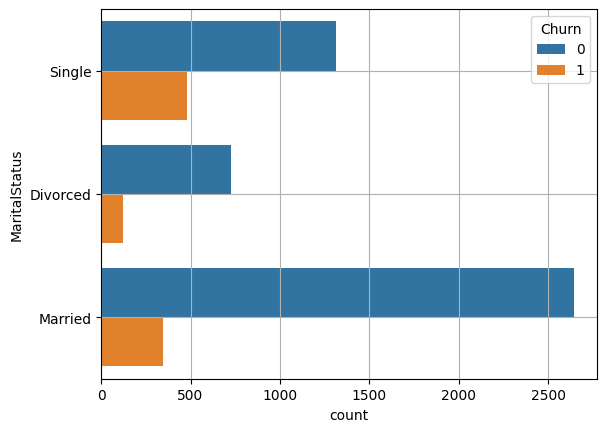

**************************************************
value counts for the category Complain is 
0    4026
1    1604
Name: Complain, dtype: int64


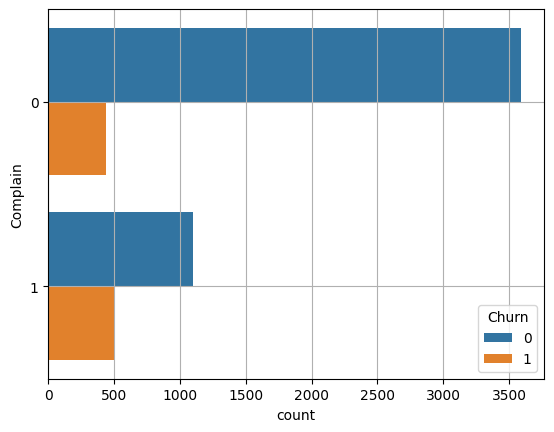

In [31]:
#Drawing a countplot to see relation b/w churn and categorical colums
for col in categorical_col:
    print("*"*50)
    print("value counts for the category {} is \n{}".format(col,data[col].value_counts()))
    sns.countplot(data=data,y=col,hue="Churn")
    plt.grid();
    plt.show();

# Observations
- From churn- 16% customer stoped taking our servive,i.e.    
  retaintion rate is 84%.Which is indicating our services are good.
- Mobile phone users are more happy with our service as  
  retaintion rate is very high **approx-89%** amongest all.
- There are very few records from Tier2 cities,that means we
   need to focus on tier2 cities more.
- Married people continuosly taking our services as compared
  with single.
- **Approx 30% Persons who are satisfied with our services are stopped taking our services.**


# Pie chart


In [32]:
#Getting the indexes in column
data["SatisfactionScore"].value_counts().index


Int64Index([3, 1, 5, 4, 2], dtype='int64')

In [33]:
#getting the valuecount for the indexes in columns
data["SatisfactionScore"].value_counts().values


array([1698, 1164, 1108, 1074,  586])

In [34]:
#assigning indexes as mylabel
mylabels=data["SatisfactionScore"].value_counts().index
#assigning values in y
y=data["SatisfactionScore"].value_counts().values


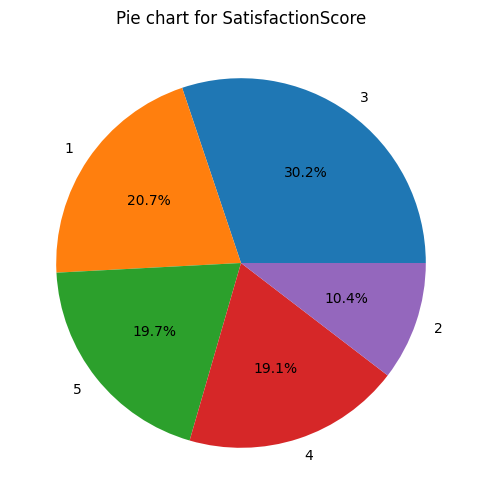

In [35]:
plt.figure(figsize=[12,6])
plt.pie(y,labels=mylabels,autopct="%1.1f%%")
plt.title("Pie chart for SatisfactionScore")
plt.show();

# Bi-Variate analysis with pie chart and countplot


# For categorical columns



**************************************************
value counts for category Churn
0    4682
1     948
Name: Churn, dtype: int64
**************************************************


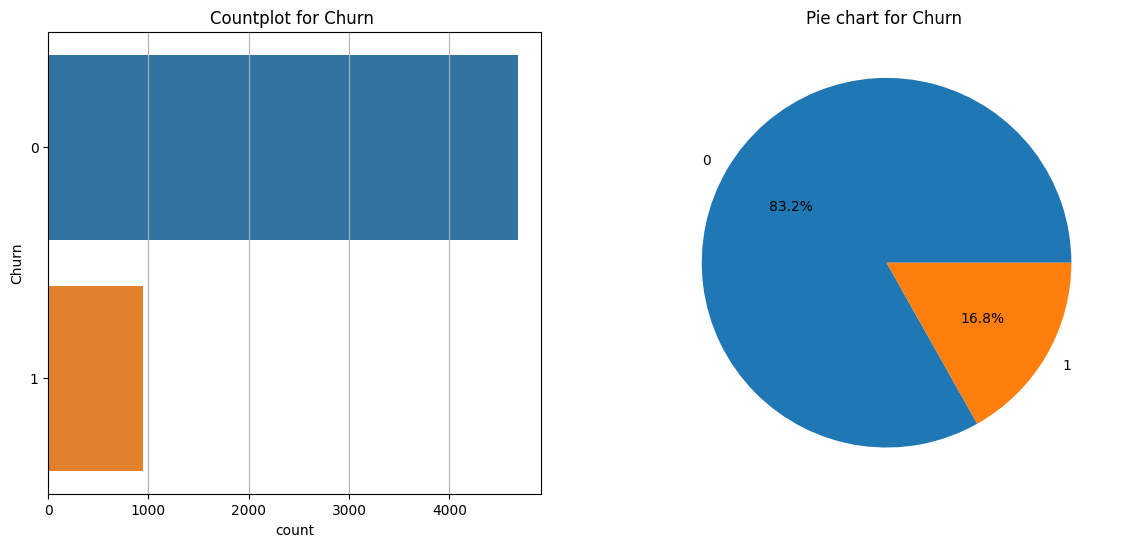

**************************************************
value counts for category PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
**************************************************


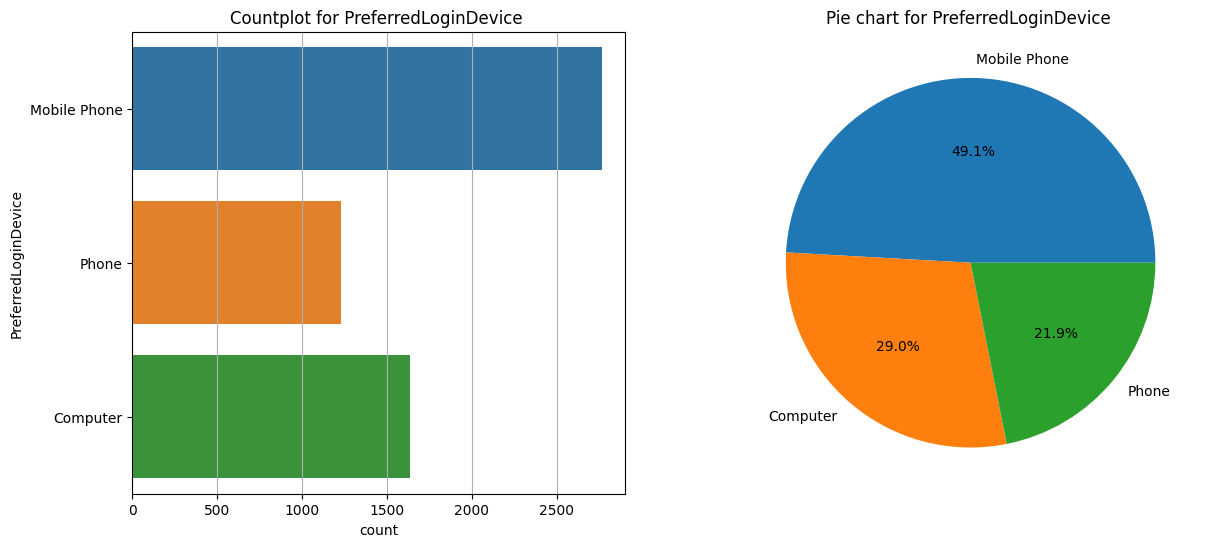

**************************************************
value counts for category CityTier
1    3666
3    1722
2     242
Name: CityTier, dtype: int64
**************************************************


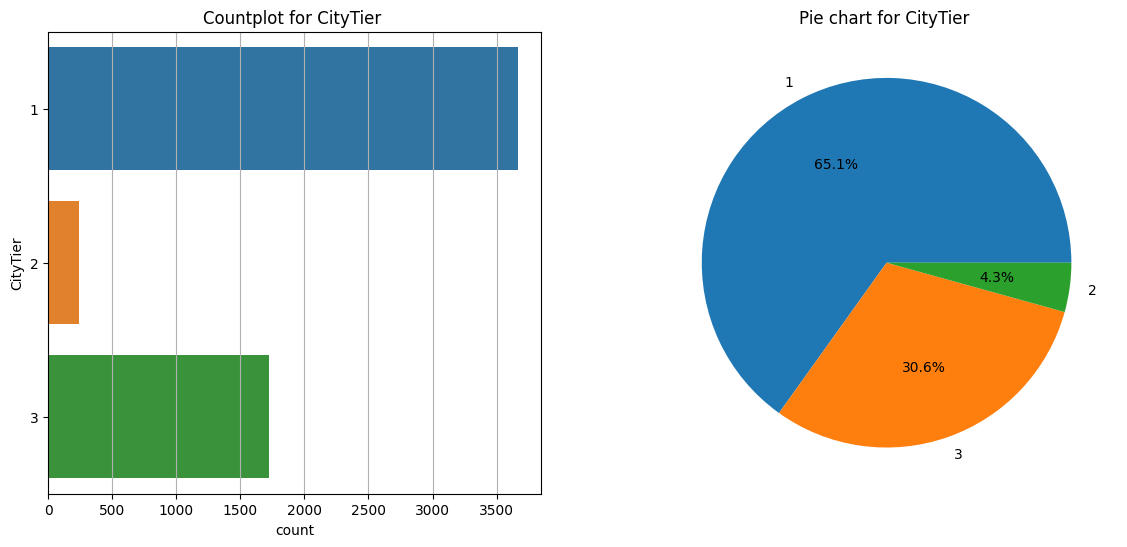

**************************************************
value counts for category PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
**************************************************


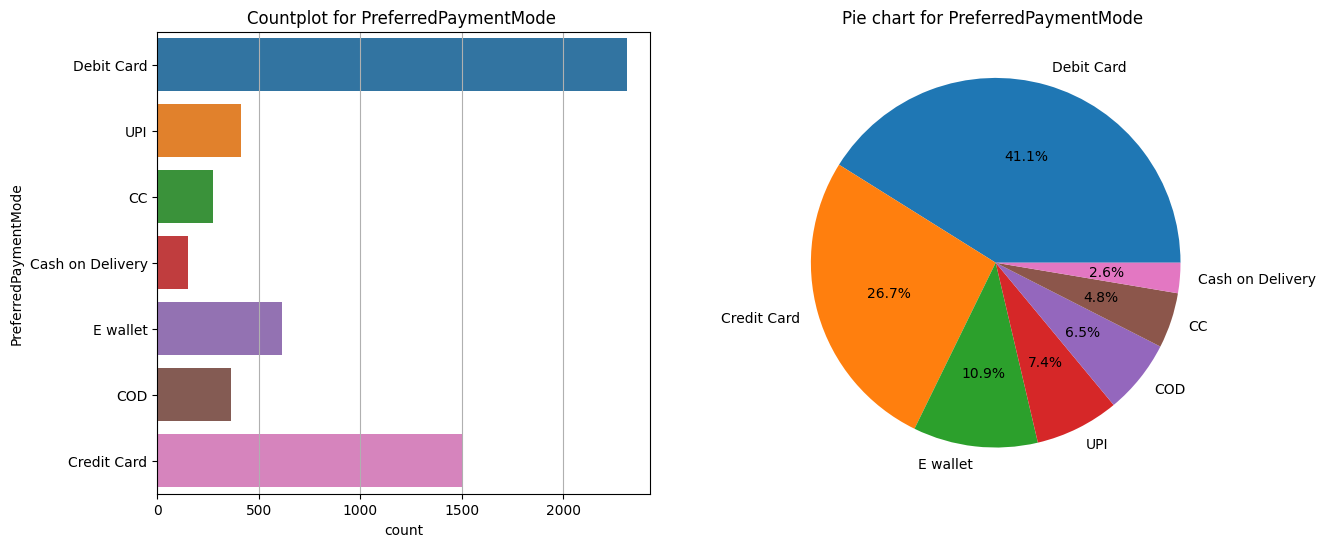

**************************************************
value counts for category Gender
Male      3384
Female    2246
Name: Gender, dtype: int64
**************************************************


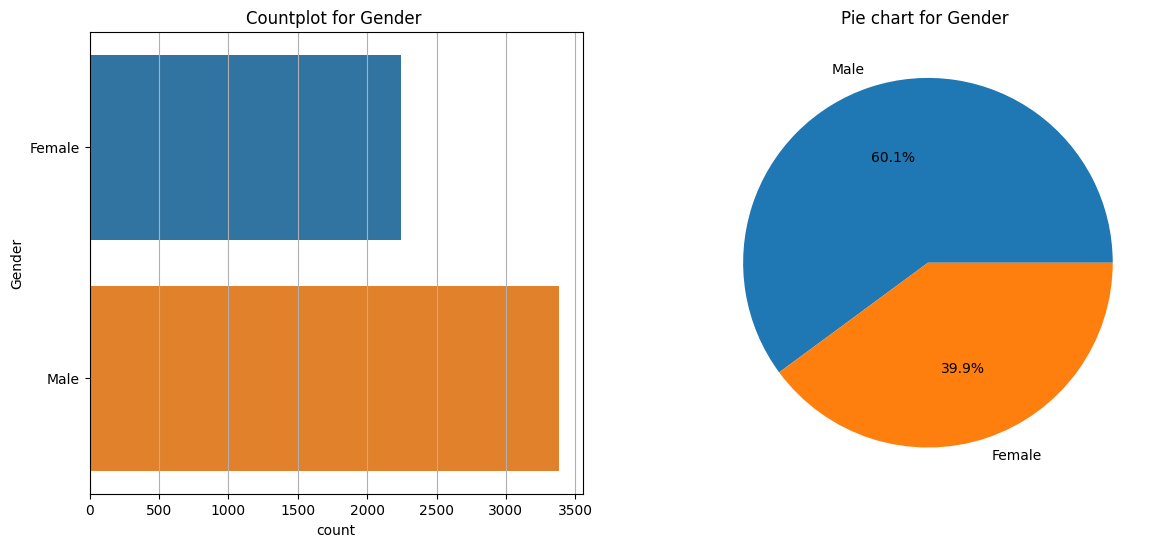

**************************************************
value counts for category PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
**************************************************


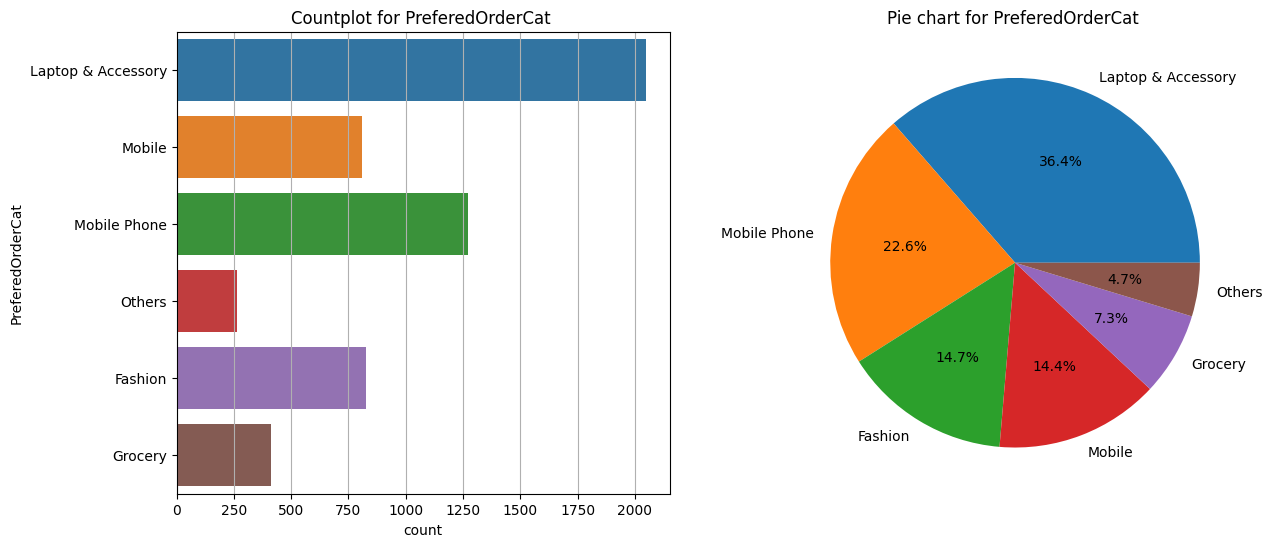

**************************************************
value counts for category SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64
**************************************************


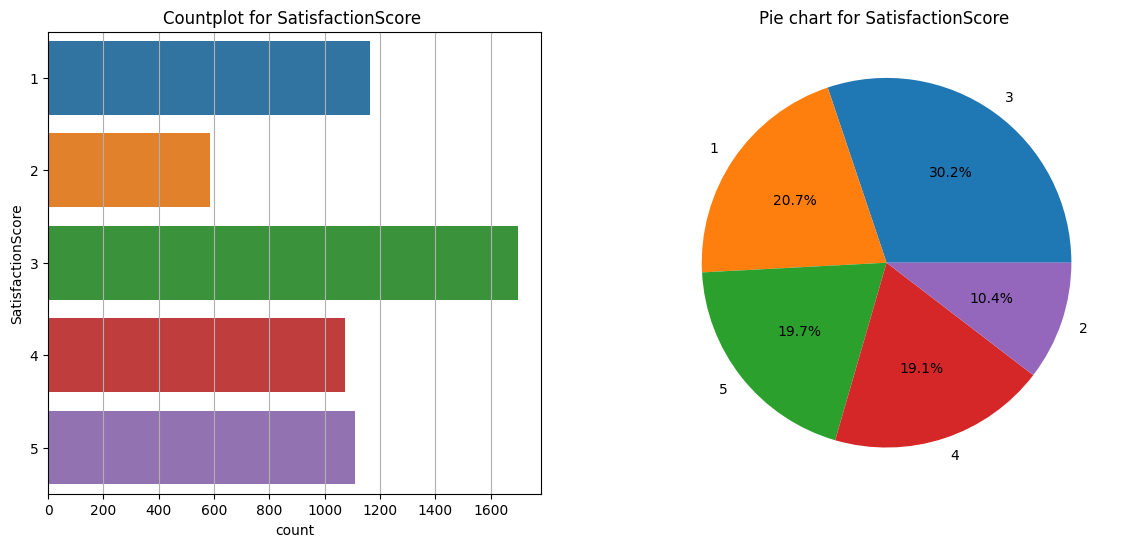

**************************************************
value counts for category MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
**************************************************


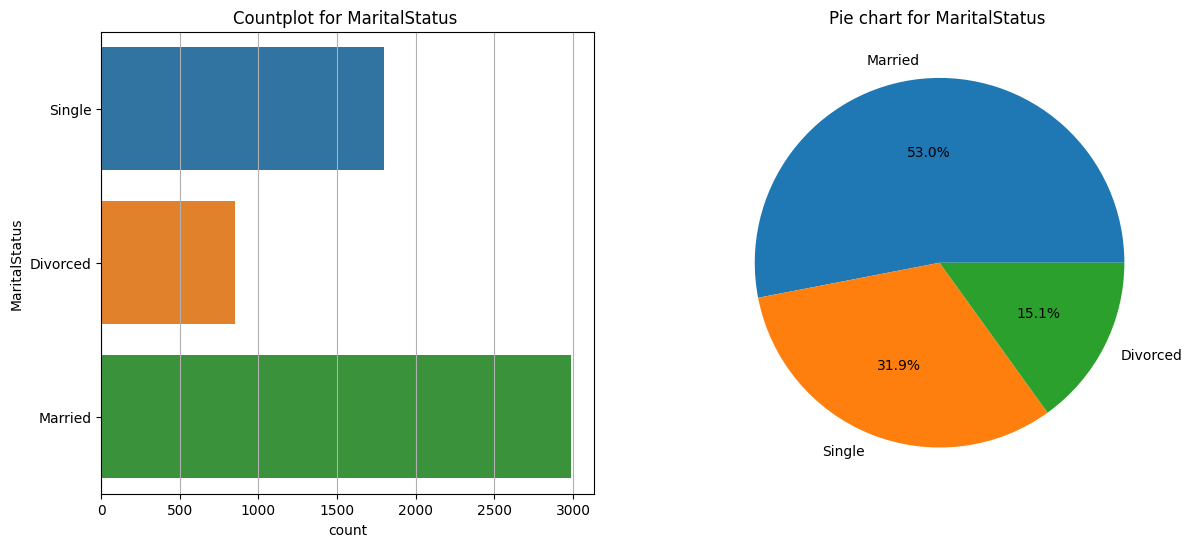

**************************************************
value counts for category Complain
0    4026
1    1604
Name: Complain, dtype: int64
**************************************************


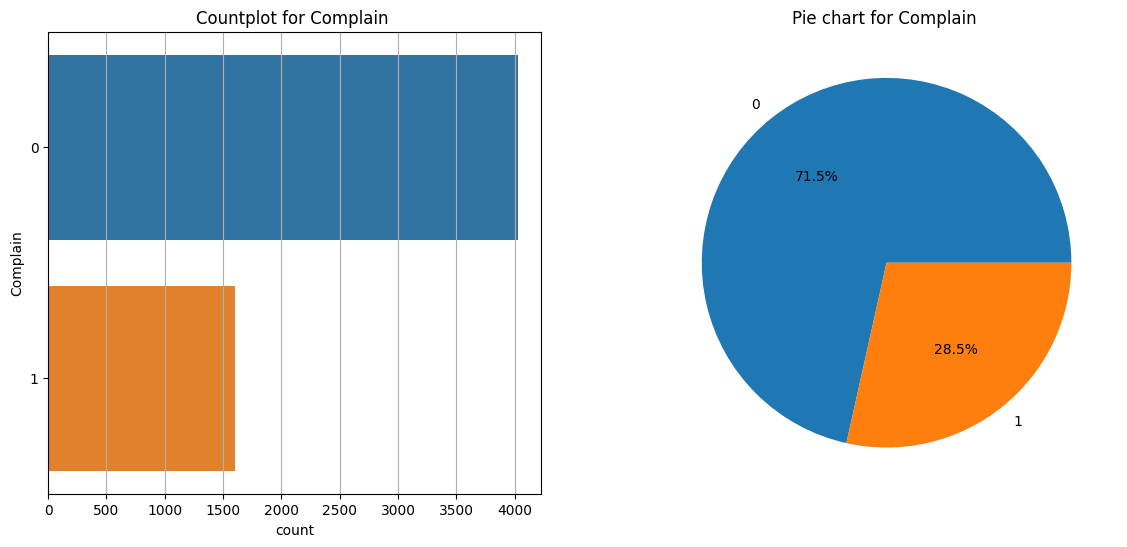

In [36]:
for col in categorical_col:

 #Defininig figure size
 plt.figure(figsize=[14,6])
 print("*"*50)
 print("value counts for category",col)
 print(data[col].value_counts())
 print("*"*50)
 #plt.Subplot for 1st diagram
 plt.subplot(1,2,1)
 #To add grid in columns
 plt.grid();
 #Plotting a counplot for columns
 sns.countplot(data=data,y=col)
 #giving title to counplot
 plt.title("Countplot for {} ".format(col))
 #plt.subplot for 2nd diagram
 plt.subplot(1,2,2)
 #giving title to pie chart
 plt.title("Pie chart for {} ".format(col))
 #Assigning indexes and labels for pi chart
 mylabels=data[col].value_counts().index
 y=data[col].value_counts().values
 #plotting a pie chart for columns
 plt.pie(y,labels=mylabels,autopct="%1.1f%%")
 plt.show();

In [37]:
categorical_col

['Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Complain']

In [38]:
data.groupby(by=['CityTier','Gender'])['SatisfactionScore'].count()

CityTier  Gender
1         Female    1442
          Male      2224
2         Female      74
          Male       168
3         Female     730
          Male       992
Name: SatisfactionScore, dtype: int64

# What is the satisfaction scores by customeres by citytier and gender?

In [39]:
pd.DataFrame(data.groupby(by=['CityTier','Gender','SatisfactionScore'])['SatisfactionScore'].count())

SatisfactionScore
CityTier Gender SatisfactionScore                   
1        Female 1                                252
                2                                142
                3                                438
                4                                300
                5                                310
         Male   1                                484
                2                                244
                3                                714
                4                                358
                5                                424
2        Female 1                                 18
                2                                  2
                3                                 22
                4                                 20
                5                                 12
         Male   1                                 34
                2                                  8
                3                                 36
                4                                 58
                5                                 32
3        Female 1                                156
                2                                 78
                3                                230
                4                                138
                5                                128
         Male   1                                220
                2                                112
                3                                258
                4                                200
                5                                202

# Bi-Variate analysis for continous columns

In [40]:
continous_col

['CustomerID',
 'Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

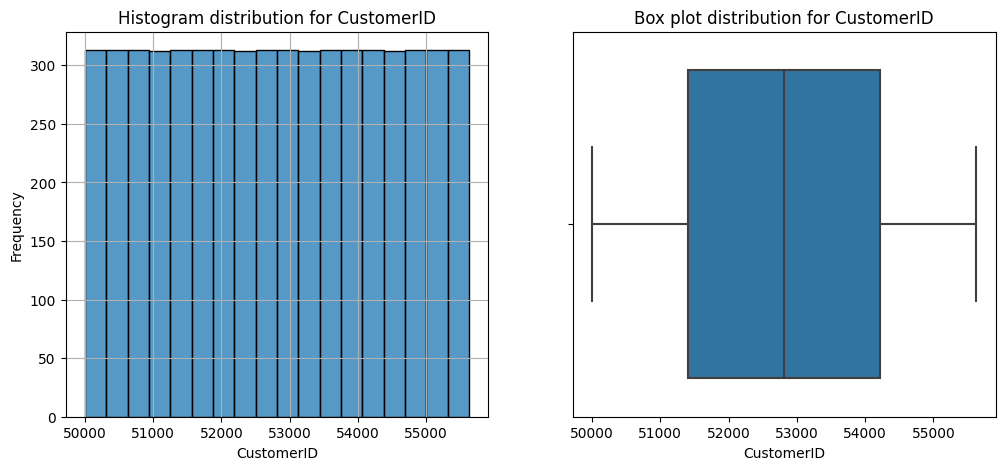

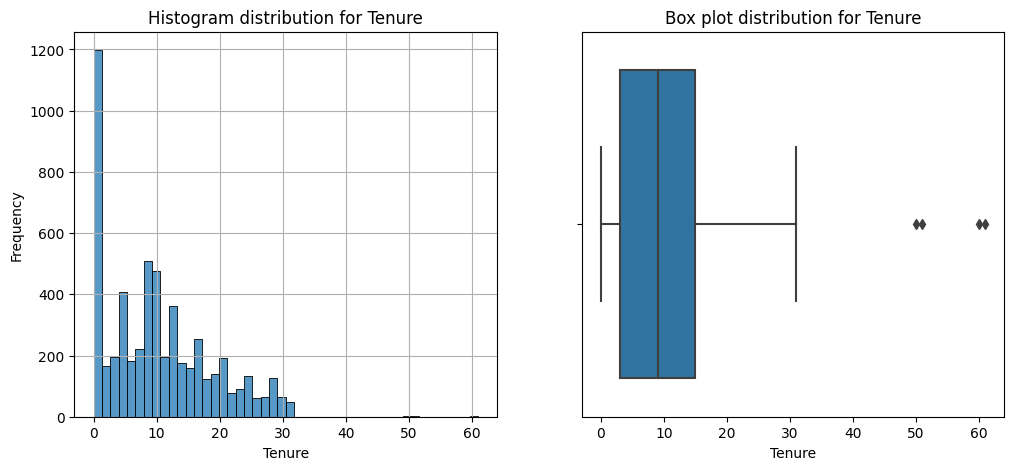

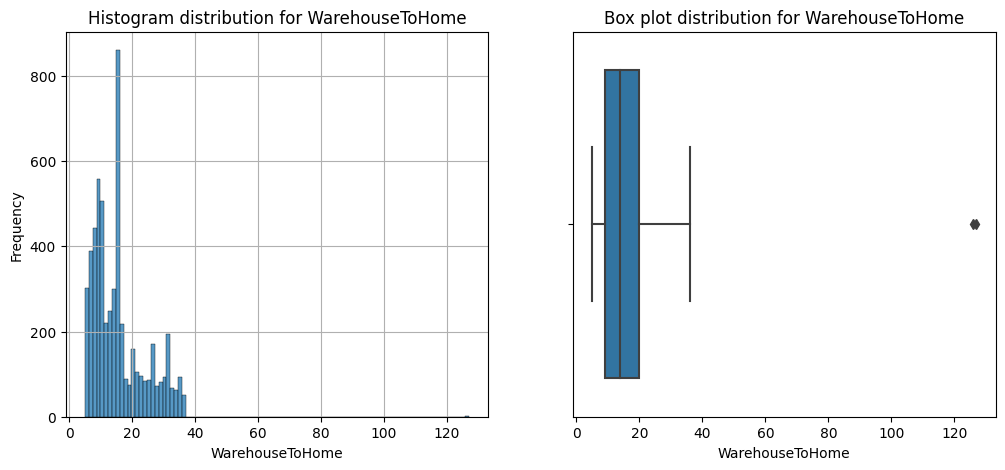

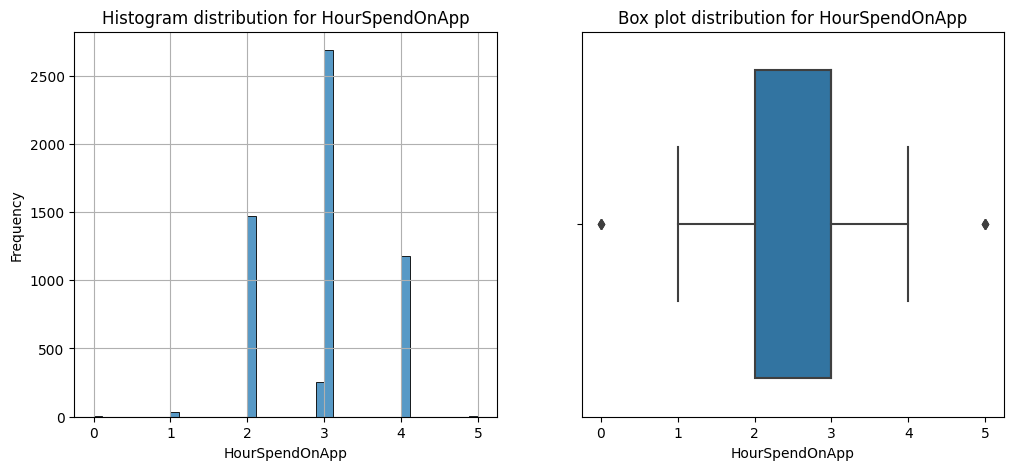

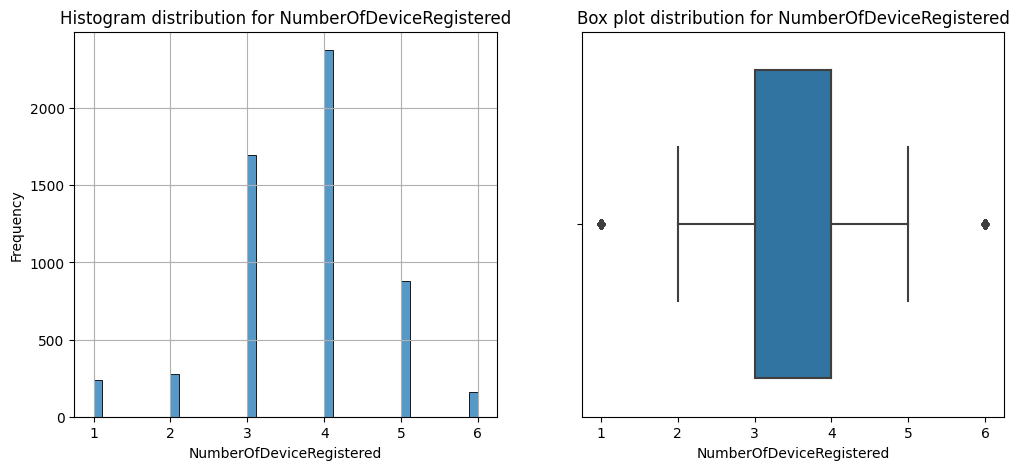

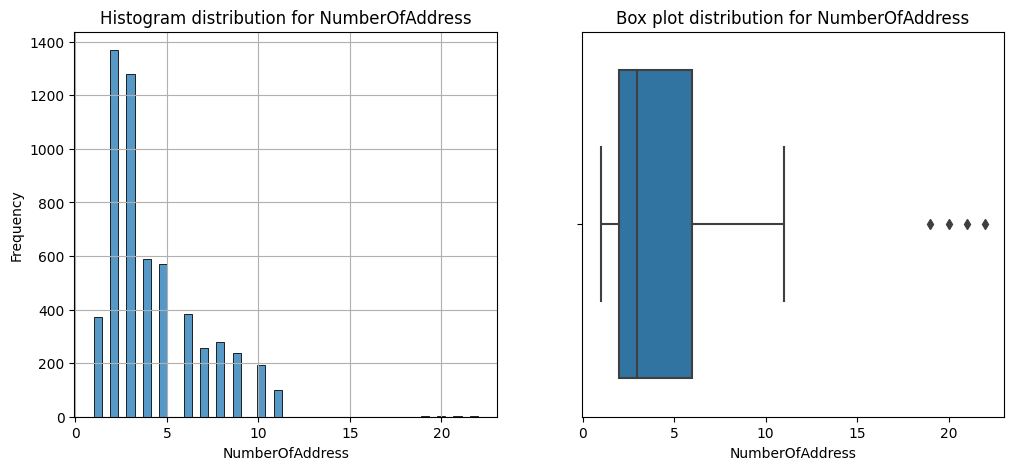

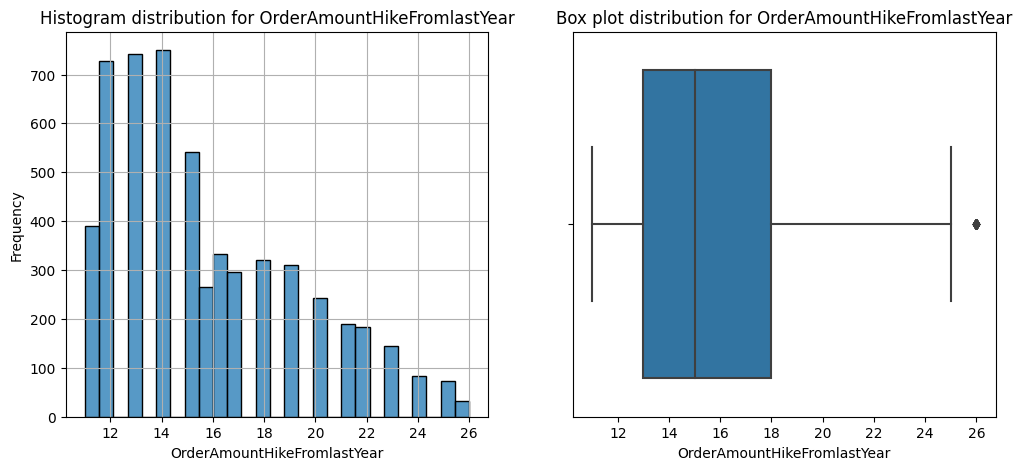

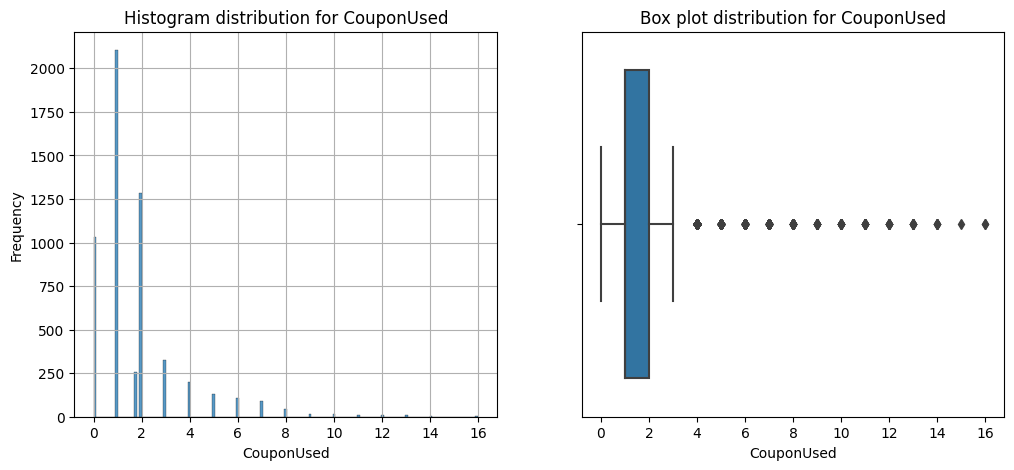

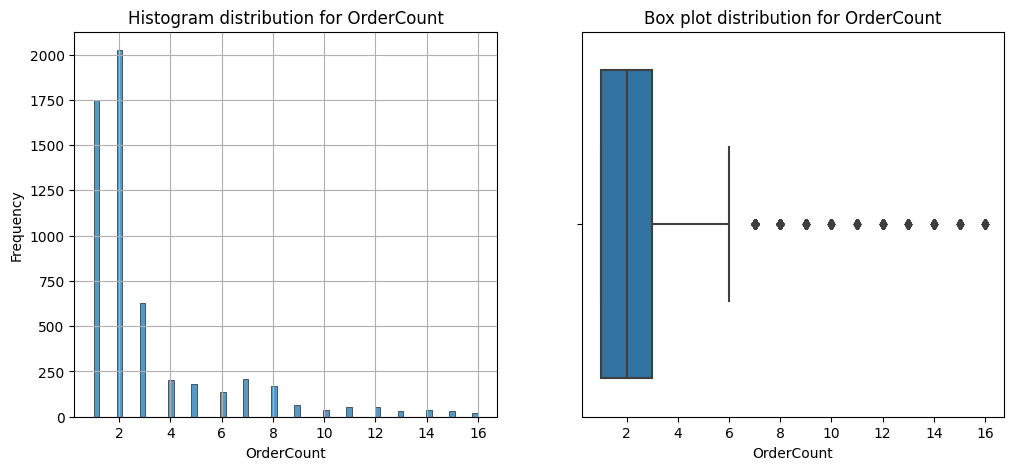

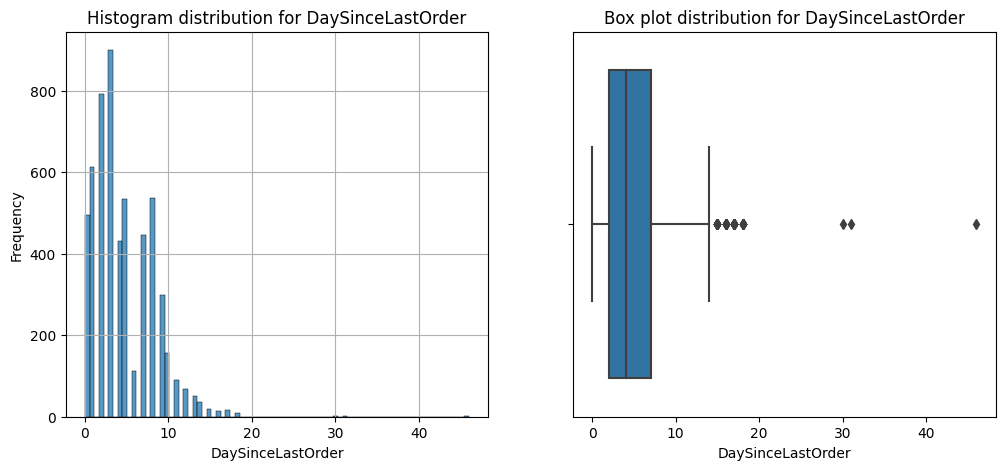

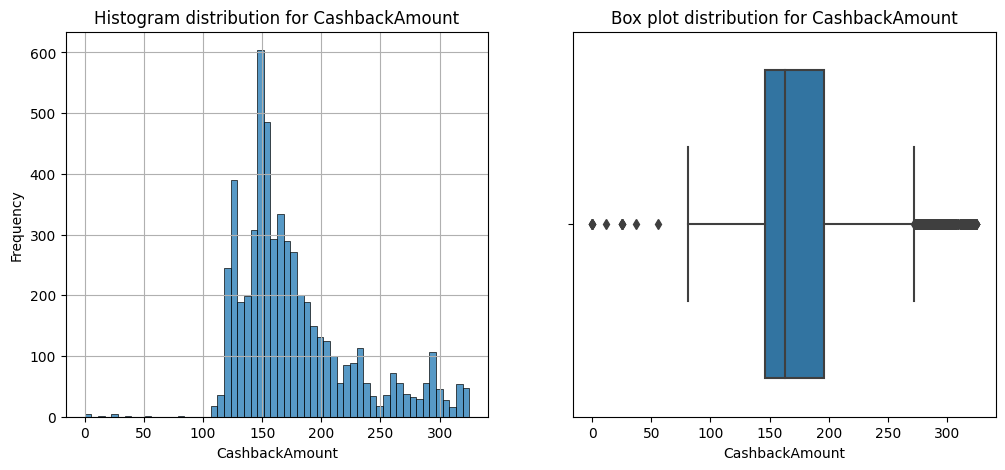

In [41]:
for col in continous_col:
    plt.figure(figsize=[12,5])
    plt.subplot(1,2,1)
    plt.grid();
    sns.histplot(data=data,x=col)
    plt.ylabel("Frequency")
    plt.title("Histogram distribution for {}".format(col))

    plt.subplot(1,2,2)
    sns.boxplot(data=data,x=col)
    plt.title("Box plot distribution for {}".format(col))
    plt.show();


#outliers analysis with violin plot and boxplot

**************************************************
**************************************************


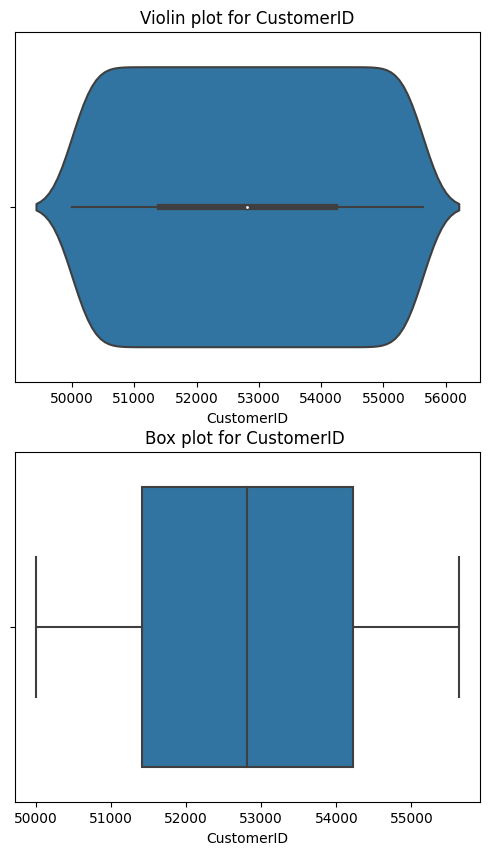

**************************************************
**************************************************


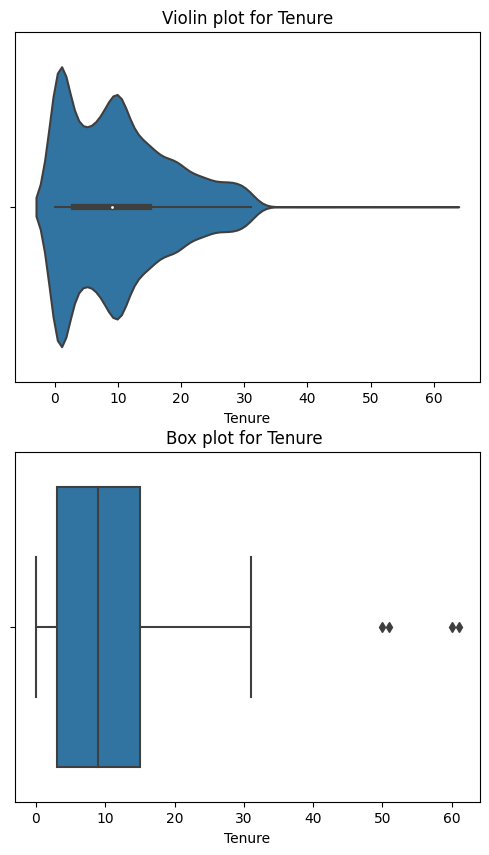

**************************************************
**************************************************


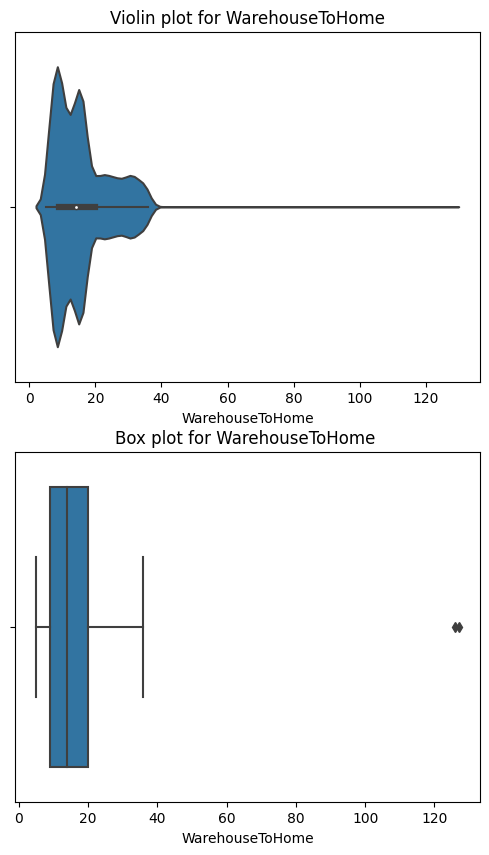

**************************************************
**************************************************


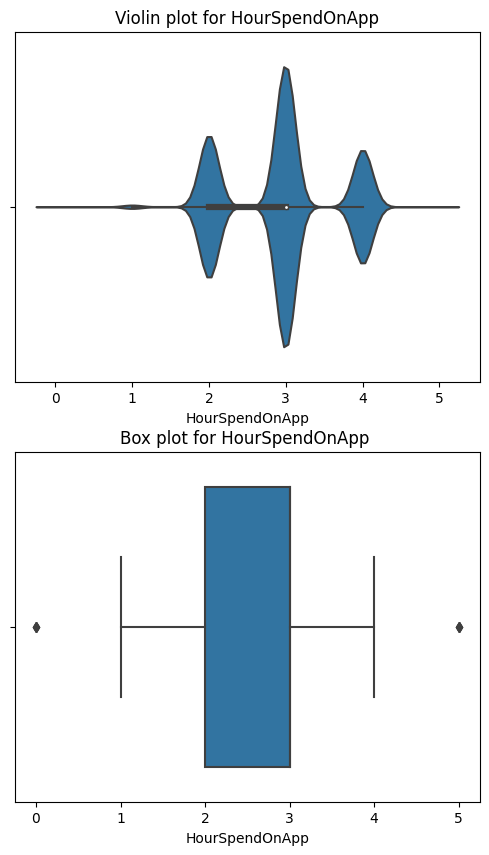

**************************************************
**************************************************


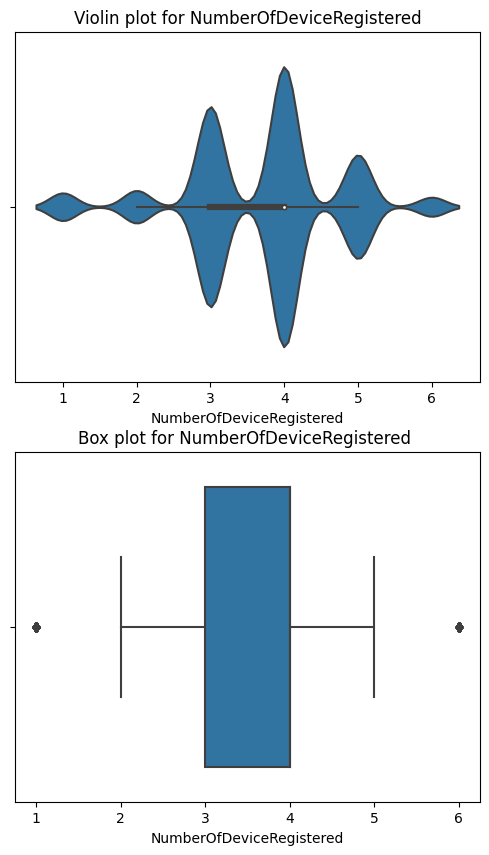

**************************************************
**************************************************


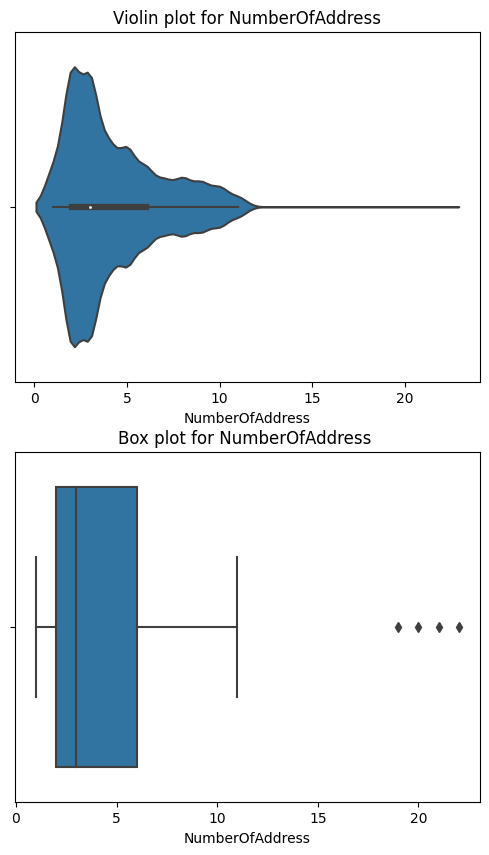

**************************************************
**************************************************


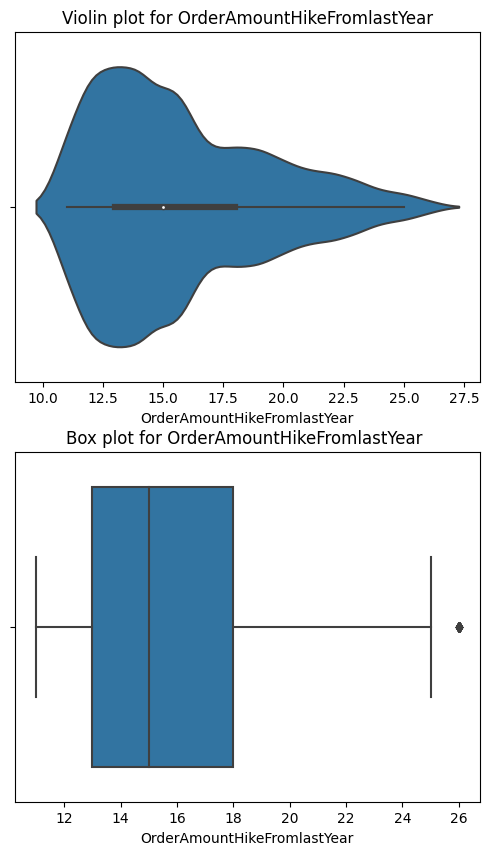

**************************************************
**************************************************


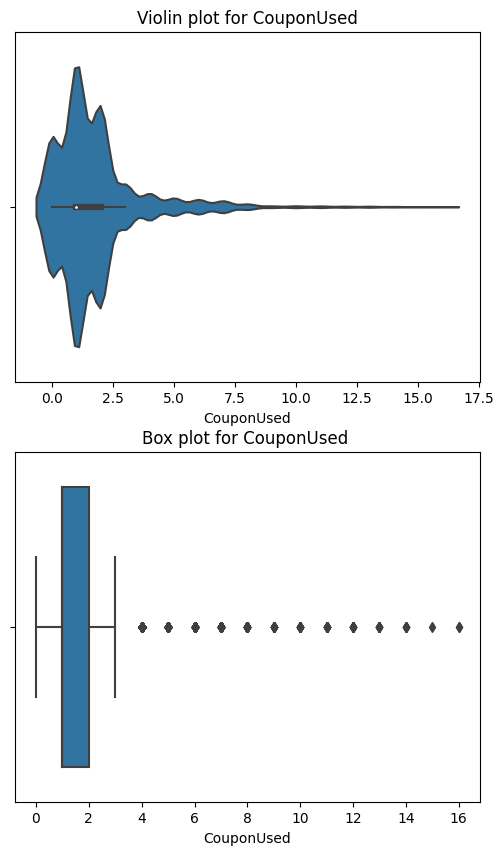

**************************************************
**************************************************


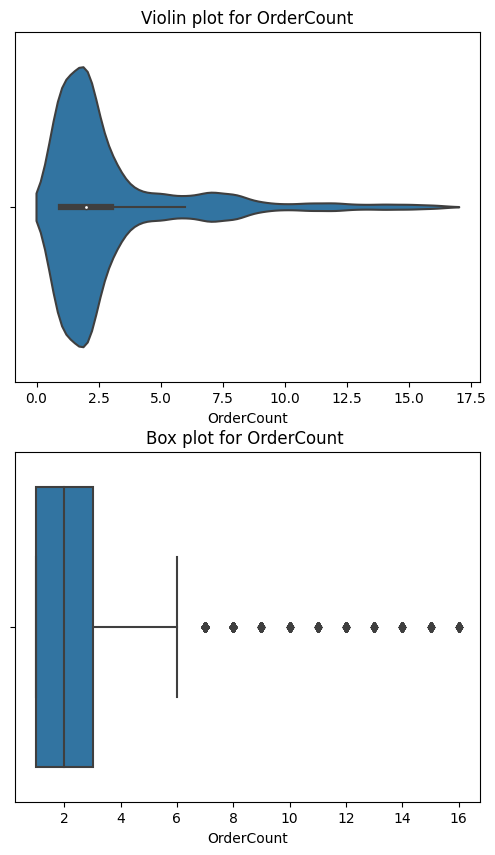

**************************************************
**************************************************


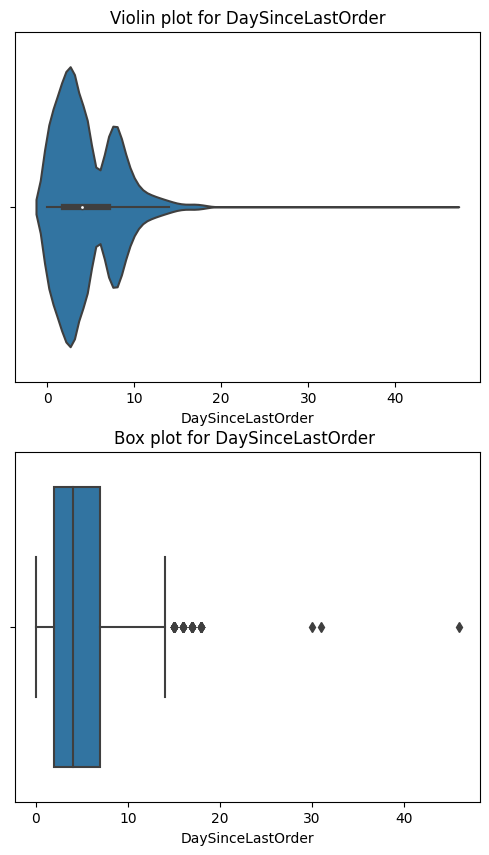

**************************************************
**************************************************


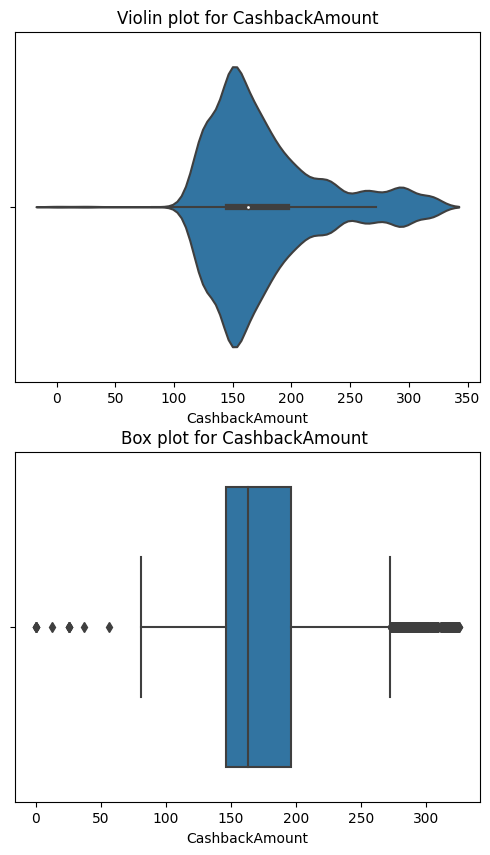

In [65]:
for col in continous_col:
    plt.figure(figsize=[6,10])
    print("*"*50)
    plt.subplot(2,1,1)
    plt.title("Violin plot for {}".format(col))
    #plotting violin plot for continous data
    sns.violinplot(data=data,x=col)
    plt.subplot(2,1,2)
    print("*"*50)
    #plotting box plot for continous data
    plt.title("Box plot for {} ".format(col))
    sns.boxplot(data=data,x=col)
    plt.show();

# *We get outliers in every data columns, so we need to normalise data using log scale*

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


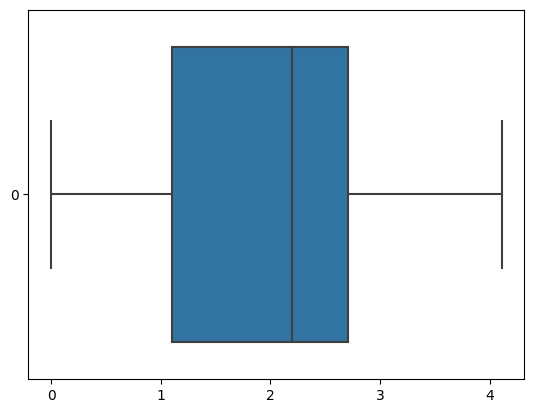

In [69]:
#converting data into log scale
sns.boxplot(np.log(data["Tenure"]),orient="h")
plt.show();

# **using histplot with or without logscale distribution**
Treating skewed Distribution with log scale

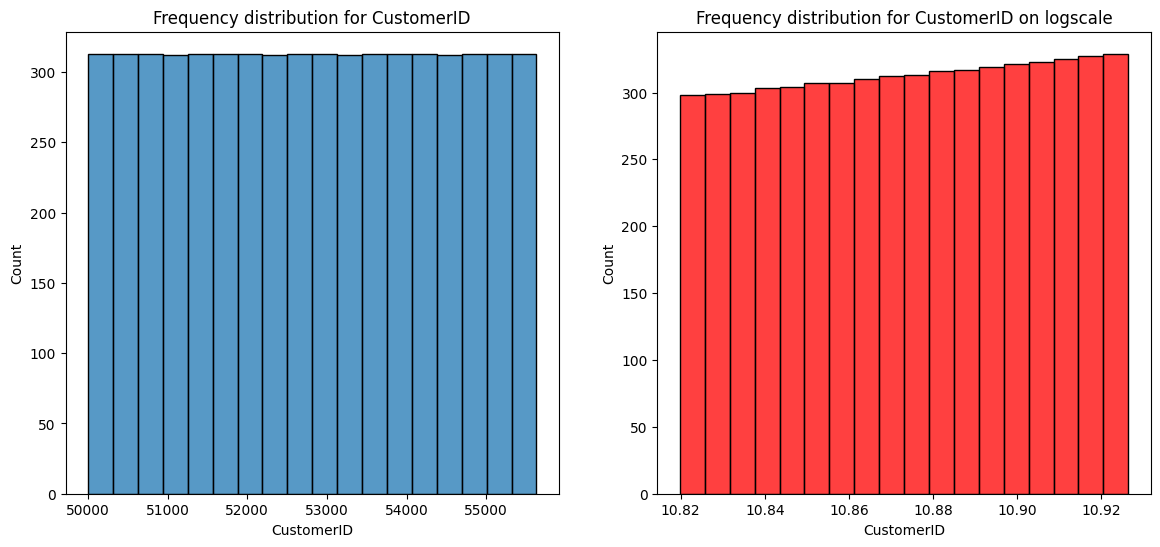

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


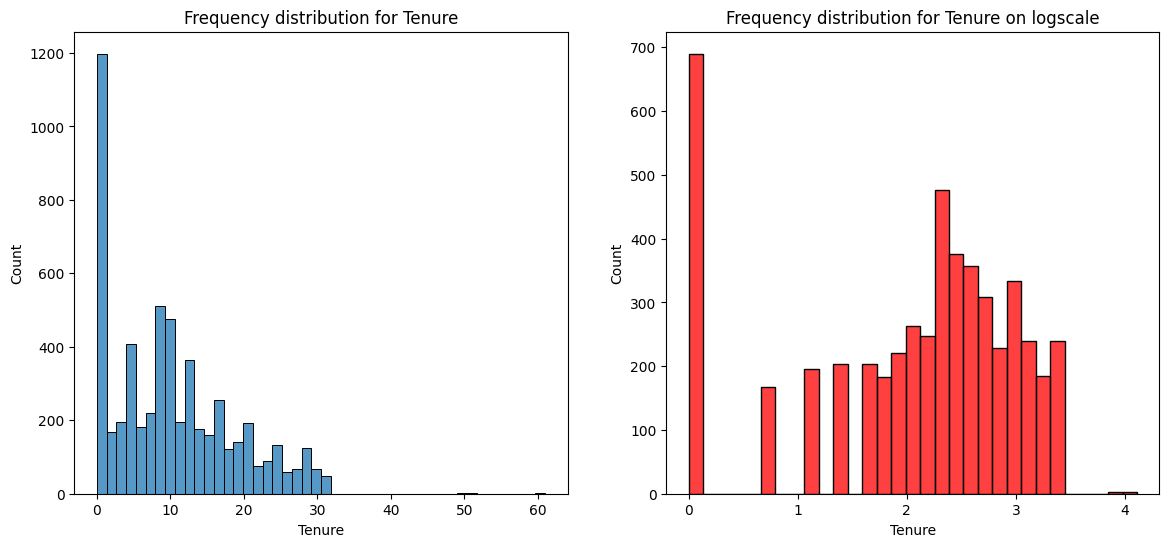

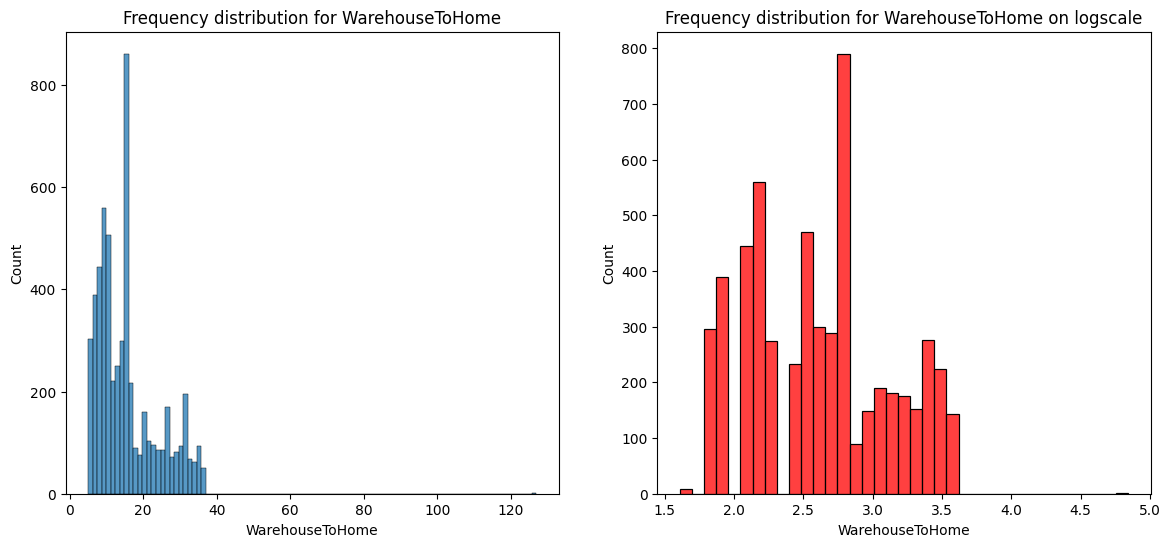

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


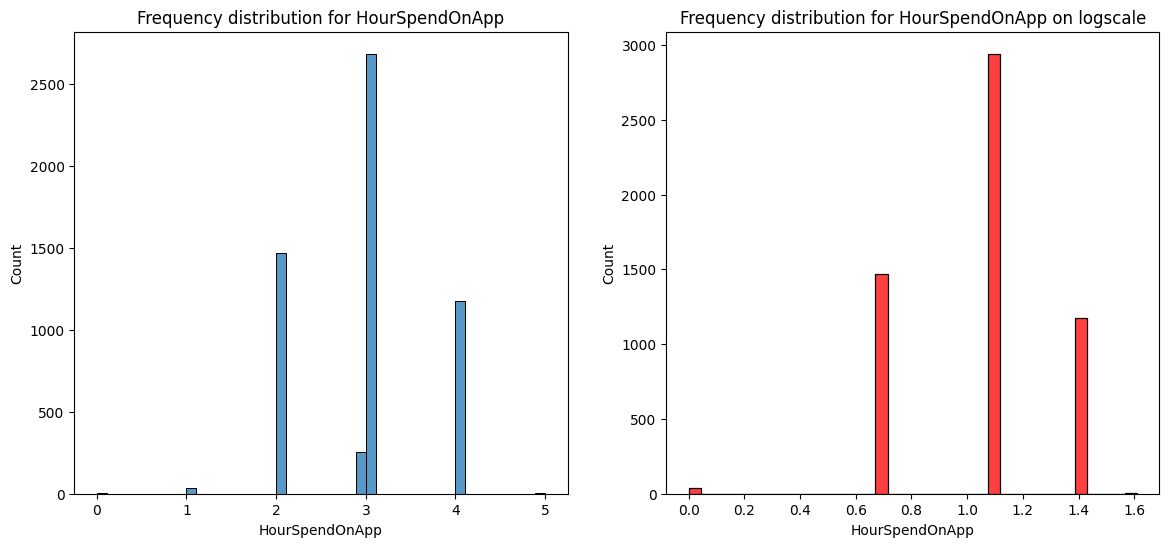

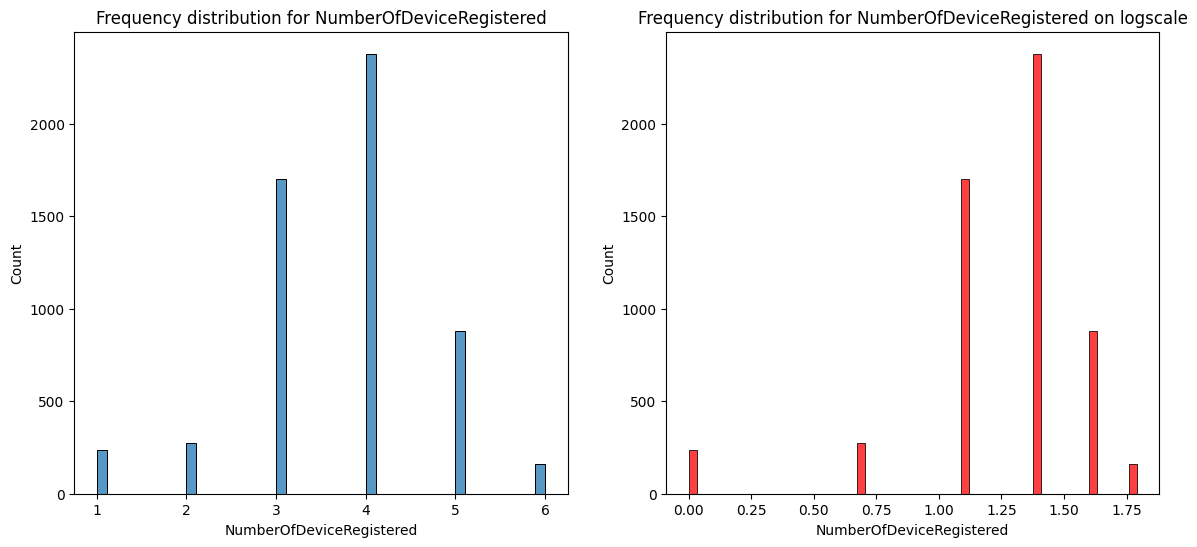

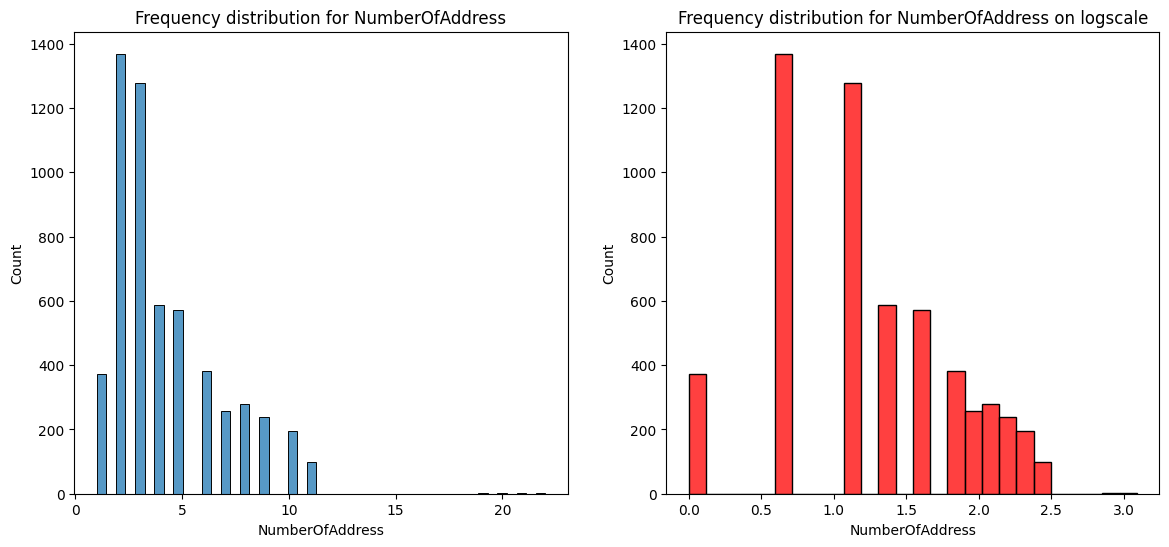

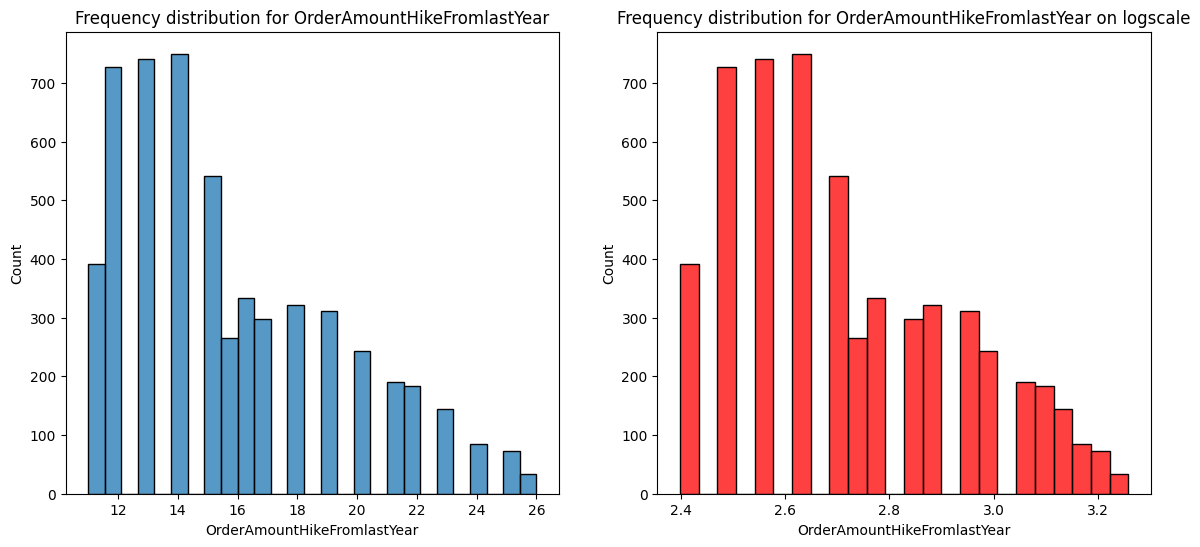

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


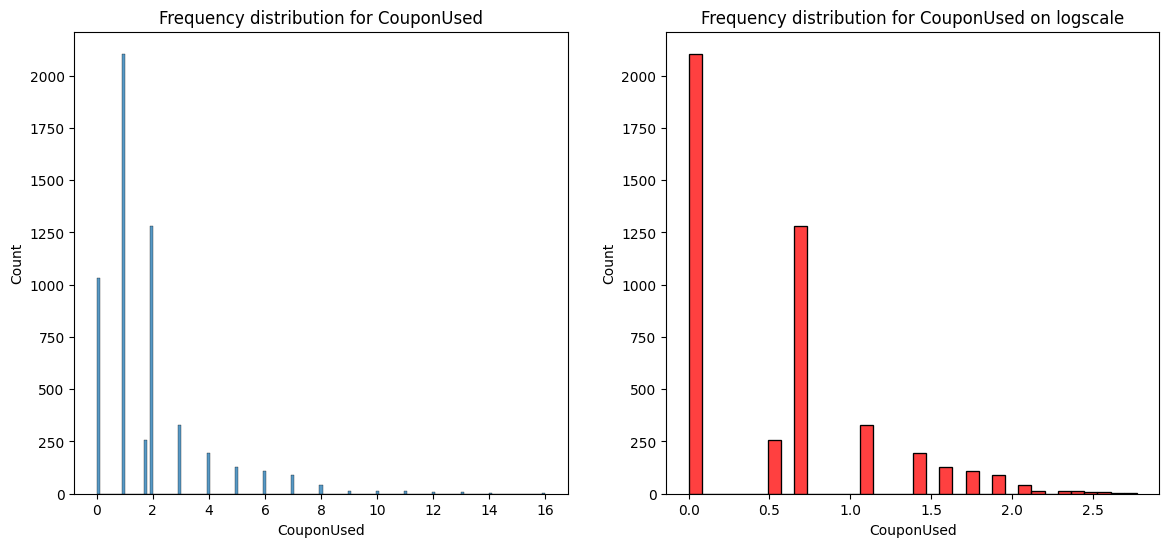

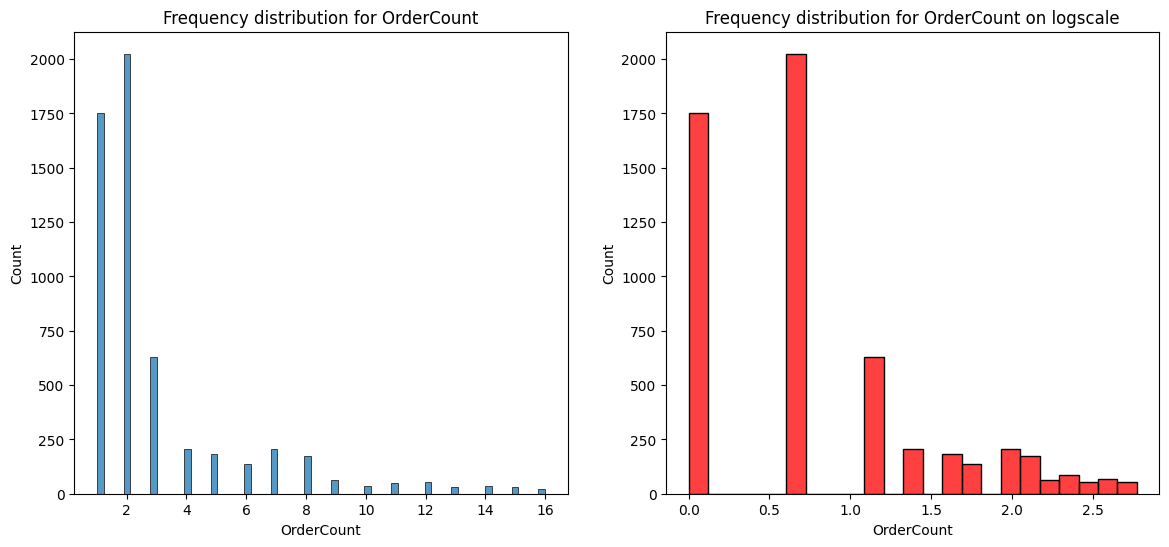

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


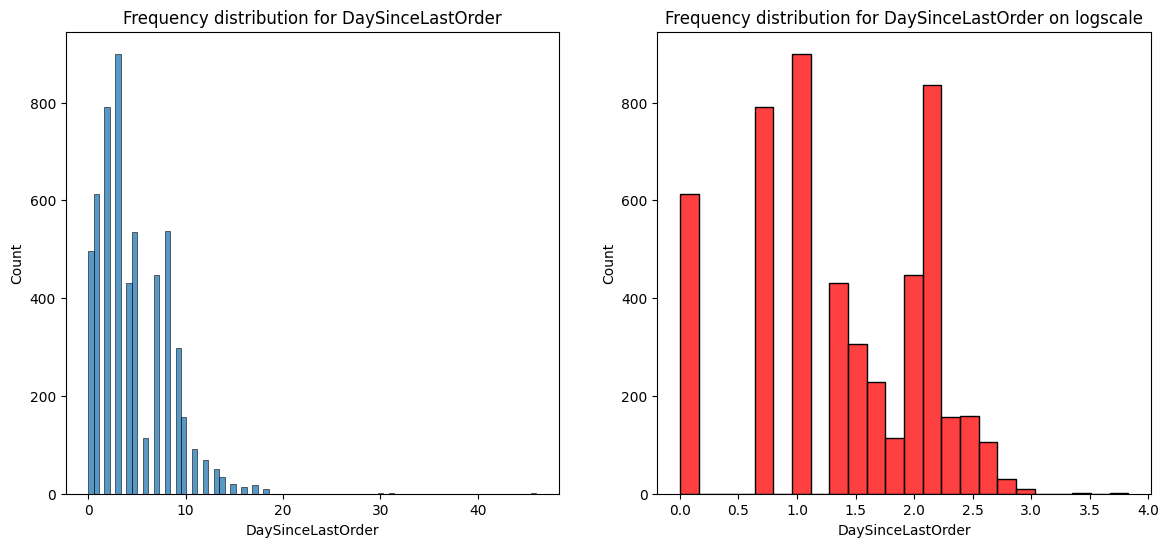

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


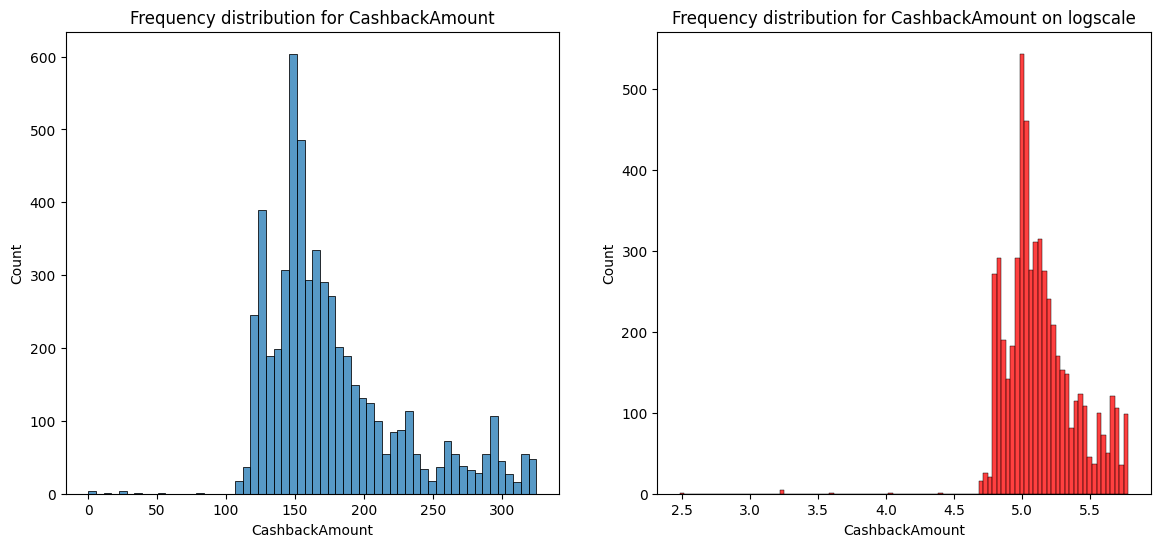

In [84]:
for col in continous_col:
    plt.figure(figsize=[14,6])
    plt.subplot(1,2,1)
    sns.histplot(data[col])
    plt.title("Frequency distribution for {}".format(col))
    plt.subplot(1,2,2)
    sns.histplot(np.log(data[col]),color="red")
    plt.title("Frequency distribution for {} on logscale".format(col))
    plt.show();



# *correlation* : with respect to change in one feature how much change results in another feature.

In [43]:
data.corr()

<ipython-input-43-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CustomerID,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,0.029183,0.057521,0.584227,0.411098,0.160814,0.114471,0.228952,0.135815,0.109938,0.217129
Tenure,0.029183,1.000000,-0.017301,-0.019451,-0.023506,0.232337,0.004907,0.119231,0.175909,0.175011,0.460495
WarehouseToHome,0.057521,-0.017301,1.000000,0.058605,0.018641,-0.010782,0.036999,-0.003641,0.002222,0.016900,-0.008952
HourSpendOnApp,0.584227,-0.019451,0.058605,1.000000,0.307749,0.141736,0.101893,0.182959,0.104631,0.071523,0.118648
NumberOfDeviceRegistered,0.411098,-0.023506,0.018641,0.307749,1.000000,0.084997,0.068148,0.148638,0.100316,0.017746,0.137183
NumberOfAddress,0.160814,0.232337,-0.010782,0.141736,0.084997,1.000000,0.015133,0.041196,-0.007375,-0.063047,0.186688
OrderAmountHikeFromlastYear,0.114471,0.004907,0.036999,0.101893,0.068148,0.015133,1.000000,0.029703,0.020570,0.005806,0.014551
CouponUsed,0.228952,0.119231,-0.003641,0.182959,0.148638,0.041196,0.029703,1.000000,0.663210,0.321492,0.257297
OrderCount,0.135815,0.175909,0.002222,0.104631,0.100316,-0.007375,0.020570,0.663210,1.000000,0.447491,0.344730
DaySinceLastOrder,0.109938,0.175011,0.016900,0.071523,0.017746,-0.063047,0.005806,0.321492,0.447491,1.000000,0.339064


# Heatmap for correlation

<ipython-input-87-9a2b2a9907be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="crest")


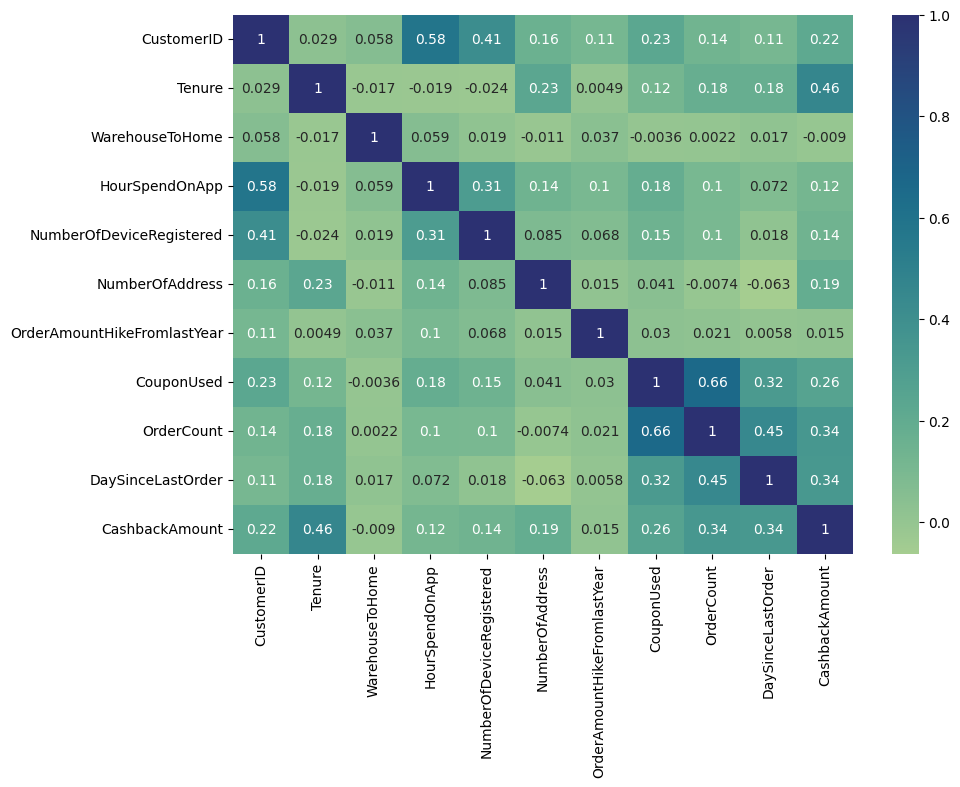

In [87]:
plt.figure(figsize=[10,7])
sns.heatmap(data.corr(),annot=True,cmap="crest")
plt.show();